# EDA

Se inicia la primer etapa del proyecto, el ANÁLISIS EXPLORATORIO DE LOS DATOS. En la misma se buscará procesar y conocer claramente los datos suministrados, identificar información clave, relaciones entre variables, datos prescindibles, formas de complementar con datos cruzados, entre otros aspectos.

Esta etapa de análisis tiene como finalidad generar posibles insights que luego podrían ser profundizados en un dashboard interactivo.

# Índice 
- 1- LIMPIEZA Y PREPROCESAMIENTO DE DATOS
	- 1.1 Dataset HECHOS_HOMICIDIOS
    	- 1.1.1- Carga de datos
    	- 1.1.2- Exploración inicial
    	- 1.1.3- Manejo de valores faltantes
    	- 1.1.4- Eliminación de columnas no relevantes
    	- 1.1.5- Detección de duplicados
    	- 1.1.6- Conversión de datos
			- 1.1.6.1 Esquema inicial del df
			- 1.1.6.2 Observaciones de conversión
			- 1.1.6.3 FECHA
			- 1.1.6.4 HORA
			- 1.1.6.5 HH
			- 1.1.6.6 TIPO_DE_CALLE, PARTICIPANTES, VICTIMA, ACUSADO, COMUNA
			- 1.1.6.7 AAAA, MM, DD, HH
			- 1.1.6.8 pos x, pos y
			- 1.1.6.9 LUGAR_DEL_HECHO
			- 1.1.6.10 Esquema final del df
    	- 1.1.7- Creación de características adicionales
			- 1.1.7.1 Nueva columna: DIA_SEMANA
			- 1.1.7.2 Nueva columna: DIA_NOCHE
			- 1.1.7.3 GRAL PAZ: AUTOPISTA
			- 1.1.7.4 Reorganización de columnas
	- 1.2- df: homicidios_semestres
	- 1.3- Dataset VÍCTIMAS
		- 1.3.1- Exploración inicial
		- 1.3.2- Manejo de valores faltantes
		- 1.3.3- Detección de duplicados
		- 1.3.4- FECHA_FALLECIMIENTO
		- 1.3.5- EDAD
		- 1.3.6- SEXO
		- 1.3.7- ROL
- 2- DF UNIFICADO: homicidios
- 3- EXPORTACIÓN DE DATOS
- 4- EXPLORACIÓN DE DATOS
    - 4.1- Resumen de Estadísticas Descriptivas
    - 4.2- Visualizaciones Gráficas
		- 4.2.1- Víctimas por Año
		- 4.2.2- Víctimas por Mes
		- 4.2.3- Víctimas por Día de Semana
		- 4.2.4- Víctimas por franja horaria
		- 4.2.5- Víctimas por Comuna
		- 4.2.6- Víctimas por Tipo de Calle
		- 4.2.7- Víctimas por Tipo de Víctima
		- 4.2.8- Víctimas por Participantes
		- 4.2.9- Distribución de EDAD

# **1- LIMPIEZA Y PREPROCESAMIENTO DE DATOS**

Es probable que los datos recopilados necesiten limpieza y transformación previo a analizarlos profundamente. Esto implica tratar valores faltantes, eliminar duplicados y estandarizar formatos.

In [1]:
# Se importan las librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  

Inicialmente contamos con 1 dataset, el cual está en formato excel y se componen por más de una planillaa:
- **homicidios.xlsx:** Información relacionada a los siniestros viales que involucran personas fallecidas. Contiene las planillas HECHOS Y VICTIMAS, cada una con su respectiva planilla de diccionario de datos

A continucación procedemos a cargar las planillas que nos interesan como DataFrames para luego analizar cada una por separado

## **1.1 dataset HECHOS_HOMICIDIOS**

### **1.1.1- Carga de Datos**

In [2]:
hechos_homicidios = pd.read_excel('Data\homicidios.xlsx')
victimas_homicidios = pd.read_excel('Data\homicidios.xlsx', sheet_name='VICTIMAS')

### **1.1.2- Exploración Inicial**

Se examinan las primeras filas de datos para comprender las columnas disponibles y el tipo de información que contienen. Luego, se identifican las columnas clave

**Comenzamos con el df hechos_homicidios**

In [3]:
hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Se observa que la información está bastante trabajada previamente y de hecho algunas columnas son derivaciones de otras con tratamiento de normalización o limpieza, con lo cual podemos suponer, en principio, que podemos descartar algunas de ellas. 

### **1.1.3- Manejo de Valores Faltantes**

Se investiga si hay valores faltantes en el conjunto de datos. Si se hallan valores faltantes, se analiza cómo abordarlos.

In [4]:
# Identificar valores faltantes
valores_faltantes = hechos_homicidios.isna().sum()
print(valores_faltantes)

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [5]:
hechos_homicidios[hechos_homicidios['Dirección Normalizada'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


In [6]:
hechos_homicidios[hechos_homicidios.Calle.isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


De las 21 columnas que contiene el dataset, tenemos 4 con valores faltantes:
- **Altura y Cruce:** son las columnas con mayor cantidad de valores faltantes, 567 y 171 respectivamente. Lo que se observa es que las mismas contienen información complementaria entre sí, con "altura" refiere a la dirección en la que ocurrió el hecho cuando éste no se dio en un cruce de calles, siendo este caso el registrado en "cruce". Podríamos mantener esto sin problemas pero vemos que toda la información acerca de las alturas y los cruces donde ocurren los hechos está completa en la columna "LUGAR_DEL_HECHO", con lo cual podemos quedarnos únicamente con ésta.
- **Dirección Normalizada:** posee 8 valores faltantes, parece ser una columna resultado de un tratamiento de normalización de la columna "calle", en la cual se encuentran los nombres de las calles de ocurrido el hecho. 7 de los 8 valores que faltan se encuentran en la columna "LUGAR_DEL_HECHO".
- **Calle:** tenemos sólo 1 valor faltante en calle, este registro además contiene valores faltantes en varios campos más. Se buscó hallar información a partir de los pocos datos que contiene pero no se encontró nada acerca del hecho, por lo cual una opción sería eliminarlo pero también tenemos toda esta información contenida en "LUGAR_DEL_HECHO" y podríamos descartar toda la columna "Calle".

EN CONCLUSIÓN: se observa que las 4 columnas refieren a información acerca de la dirección del lugar donde ocurrió el siniestro vial, los mismos parecen ser los registros inmediatos a los hechos que luego de un tratamiento de limpieza y normalización se unificó toda la información de las 4 columnas en una sola llamada LUGAR_DEL_HECHO. Lo cual podría llevarnos a quedarnos sólo con ésta última y descartar las demás, veamos si esto no genera inconvenientes.

### **1.1.4- Eliminación de Columnas No Relevantes** 

Del analisis anterior procedemos a eliminar ciertas columnas

In [7]:
hechos_homicidios.drop(columns=['Calle','Altura','Cruce','Dirección Normalizada'], inplace=True)

In [8]:
hechos_homicidios.isnull().sum()

ID                 0
N_VICTIMAS         0
FECHA              0
AAAA               0
MM                 0
DD                 0
HORA               0
HH                 0
LUGAR_DEL_HECHO    0
TIPO_DE_CALLE      0
COMUNA             0
XY (CABA)          0
pos x              0
pos y              0
PARTICIPANTES      0
VICTIMA            0
ACUSADO            0
dtype: int64

En efecto, al quitar las 4 columnas con faltantes, nuestro df ha quedado sin valores faltantes. Sin embargo se observó que algunos de estos faltantes han sido imputados con el término "SD" que refiere a "sin dato". Veamos cuantos SD tenemos

In [9]:
contador_por_columna = {}  # Un diccionario para almacenar los porcentajes por columna
total_filas = len(hechos_homicidios)  # Número total de filas en el DataFrame

for columna in hechos_homicidios.columns:
    numero_de_SD = (hechos_homicidios[columna] == 'SD').sum()
    porcentaje_de_SD = (numero_de_SD / total_filas) * 100
    contador_por_columna[columna] = porcentaje_de_SD

# Muestra el porcentaje de 'SD' por columna
for columna, porcentaje in contador_por_columna.items():
    print(f"Columna '{columna}': {porcentaje:.2f}% de 'SD'")


Columna 'ID': 0.00% de 'SD'
Columna 'N_VICTIMAS': 0.00% de 'SD'
Columna 'FECHA': 0.00% de 'SD'
Columna 'AAAA': 0.00% de 'SD'
Columna 'MM': 0.00% de 'SD'
Columna 'DD': 0.00% de 'SD'
Columna 'HORA': 0.14% de 'SD'
Columna 'HH': 0.14% de 'SD'
Columna 'LUGAR_DEL_HECHO': 0.14% de 'SD'
Columna 'TIPO_DE_CALLE': 0.00% de 'SD'
Columna 'COMUNA': 0.00% de 'SD'
Columna 'XY (CABA)': 0.00% de 'SD'
Columna 'pos x': 0.00% de 'SD'
Columna 'pos y': 0.00% de 'SD'
Columna 'PARTICIPANTES': 0.00% de 'SD'
Columna 'VICTIMA': 1.29% de 'SD'
Columna 'ACUSADO': 3.30% de 'SD'


Se observa que la mayor cantidad de SD se encuentra en la columna "ACUSADO " y "VICTIMA" también posee una cantidad considerable pero ninguna es significativa. Consideramos que por el momento esto no parece ser un inconveniente para el analisis.

### **1.1.5- Detección de Duplicados**

Revisamos si hay valores duplicados que debamos eliminar

In [10]:
hechos_homicidios.duplicated().sum()

0

No se observan valores duplicados

### **1.1.6- Limpieza y Conversión de Datos**

Nos aseguramos de que los tipos de datos de cada columna sean apropiados. Por ejemplo, el nro de victimas deben ser numeros enteros, las fechas deben ser objetos de fecha y hora, las ubicaciones pueden requerir formatos específicos, etc.

#### **1.1.6.1- Esquema inicial del df**

In [11]:
hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             696 non-null    object        
 7   HH               696 non-null    object        
 8   LUGAR_DEL_HECHO  696 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  COMUNA           696 non-null    int64         
 11  XY (CABA)        696 non-null    object        
 12  pos x            696 non-null    object        
 13  pos y            696 non-null    object        
 14  PARTICIPANTES    696 non-null    object   

#### **1.1.6.2- Observaciones de conversión**
- FECHA: de datetime64[ns] a datetime.date
- HORA: de object a time
- HH: de object a int
- TIPO_DE_CALLE, PARTICPANTES, VICTIMA, ACUSADO, COMUNA: de object a category
- AAAA, MM, DD, HH: de object a category
- pos x, pos y: de object a float

#### **1.1.6.3- FECHA**

Como ya tenemos los registros de las horas de los hecho en la columna HORA, no es necesario ese dato en esta columna, nos quedamos solo con las fechas

In [12]:
hechos_homicidios['FECHA'][0]

Timestamp('2016-01-01 00:00:00')

In [13]:
# Nos quedamos sólo con los valores de fecha
hechos_homicidios['FECHA'] = hechos_homicidios['FECHA'].dt.date

In [14]:
hechos_homicidios['FECHA'][0]

datetime.date(2016, 1, 1)

#### **1.1.6.4- HORA**

In [15]:
# Analizamos los tipos de datos que tenemos en la columna HORA
tipos_de_datos_hora = hechos_homicidios['HORA'].apply(type).unique()
print(tipos_de_datos_hora)

[<class 'datetime.time'> <class 'str'> <class 'datetime.datetime'>]


Se observa que la columna contiene datos del tipo str y datetime.datetime que no corresponden al formato de hora, por lo cual lo corregimos

Comenzamos con los tipo datetime.datetime

In [16]:
from datetime import datetime, time

# Definimos una función para extraer la hora y los minutos y crear objetos datetime.time
def convertir_a_datetime_time(valor):
    if isinstance(valor, datetime):
        return time(valor.hour, valor.minute)
    return valor

# Aplicamos la función a la columna "HORA" del DataFrame
hechos_homicidios['HORA'] = hechos_homicidios['HORA'].apply(convertir_a_datetime_time)

In [17]:
# Corroboramos los tipos de datos que tenemos en la columna HORA luego de la transformacion
tipos_de_datos_hora_despues = hechos_homicidios['HORA'].apply(type).unique()
print(tipos_de_datos_hora_despues)

[<class 'datetime.time'> <class 'str'>]


Seguimos con los datos del tipo str

In [18]:
# Filtramos los registros en los que la columna 'HORA' sea de tipo str
registros_str_hora = hechos_homicidios[hechos_homicidios['HORA'].apply(lambda x: isinstance(x, str))]

# Ahora, registros_str_hora contiene solo los registros en los que 'HORA' es de tipo str
registros_str_hora

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
275,2018-0001,1,2018-01-01,2018,1,1,22:50:00,22,San Juan Av. Y Rincón,AVENIDA,3,Point (106229.70400707 100696.43939679),-58.39536773,-34.62297346,PEATON-MOTO,PEATON,MOTO
276,2018-0002,1,2018-01-03,2018,1,3,16:40:00,16,Peru 937,CALLE,1,Point (108138.18410245 101140.78821350),-58.37456088,-34.61895467,BICICLETA-PASAJEROS,BICICLETA,PASAJEROS
277,2018-0003,1,2018-01-05,2018,1,5,10:12:00,10,"Pueyrredon, Honorio, Dr. Av. y Galicia",AVENIDA,15,Point (101348.13972450 102808.02053976),-58.44860217,-34.60395657,MULTIPLE,PEATON,MULTIPLE
278,2018-0004,1,2018-01-09,2018,1,9,09:40:00,9,Del Libertador Av. y Manzanares,AVENIDA,13,Point (100183.96103971 109533.84269558),-58.46129513,-34.54332766,MULTIPLE,MOTO,MULTIPLE
279,2018-0005,1,2018-01-09,2018,1,9,22:30:00,22,Paseo Colon Av. 1019,AVENIDA,1,Point (108641.50518777 101075.93727953),-58.36907201,-34.61953517,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2018-0138,1,2018-12-21,2018,12,21,09:30:00,9,Bermudez 1893,CALLE,10,Point (95944.83421152 100945.68379559),-58.50751833,-34.62073702,PASAJEROS-PASAJEROS,PASAJEROS,PASAJEROS
413,2018-0139,1,2018-12-22,2018,12,22,06:30:00,6,Santander 1974,CALLE,7,Point (101510.09611838 98933.71958961),-58.44682986,-34.63888084,MOTO-MOTO,MOTO,MOTO
416,2018-0142,1,2018-12-25,2018,12,25,13:30:00,13,"PAZ, GRAL. AV. 5172",GRAL PAZ,12,Point (95716.93710226 106295.47905158),-58.50997604,-34.57251072,CARGAS-PASAJEROS,CARGAS,PASAJEROS
417,2018-0143,1,2018-12-29,2018,12,29,05:25:00,5,"Olivera Av. y Alberdi, Juan Bautista Av.",AVENIDA,10,Point (97912.79273192 98756.38729095),-58.48606475,-34.64047818,MOTO-AUTO,MOTO,AUTO


In [19]:
# Observamos sus valores
registros_str_hora.HORA.unique()

array(['22:50:00', '16:40:00', '10:12:00', '09:40:00', '22:30:00',
       '21:15:00', '02:30:00', '17:50:00', '10:30:00', '13:30:00',
       '08:15:00', '20:00:00', '01:00:00', '10:15:00', '04:15:00',
       '07:15:00', '12:30:00', '22:00:00', '10:45:00', '00:00:00',
       '06:00:00', '23:00:00', '04:45:00', '15:45:00', '18:00:00',
       '01:30:00', '13:00:00', '18:15:00', '16:45:00', '23:15:00',
       '06:30:00', '09:00:00', '07:00:00', '03:15:00', '18:45:00',
       '20:30:00', '11:15:00', '19:20:00', '17:56:00', '10:34:00',
       '08:20:00', '08:41:00', '05:35:00', '00:59:00', '22:20:00',
       '05:00:00', '14:25:00', '00:15:00', '00:30:00', '17:51:00',
       '18:12:00', '22:02:00', '14:20:00', '22:12:00', '03:05:00',
       '12:13:00', '09:18:00', '11:00:00', '02:15:00', '14:49:00',
       '13:34:00', '16:32:00', '03:32:00', '19:40:00', '21:12:00',
       '09:14:00', '04:30:00', '04:01:00', '03:00:00', '08:26:00',
       '14:07:00', '21:00:00', '15:42:00', '09:30:00', '05:25:

In [20]:
# Ubicamos el registro de SD
registros_str_hora[registros_str_hora.HORA=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


A este registro lo vamos a imputar con el valor promedio de horas para que no genere un problema posteriormente

In [21]:
# Calcular el valor promedio de horas
promedio_horas = pd.to_datetime(hechos_homicidios['HORA'], format='%H:%M:%S', errors='coerce').mean()
# Reemplazar 'SD' por el valor promedio de horas
registros_str_hora.at[518, 'HORA'] = promedio_horas.strftime('%H:%M:%S')

In [22]:
registros_str_hora.HORA.unique()

array(['22:50:00', '16:40:00', '10:12:00', '09:40:00', '22:30:00',
       '21:15:00', '02:30:00', '17:50:00', '10:30:00', '13:30:00',
       '08:15:00', '20:00:00', '01:00:00', '10:15:00', '04:15:00',
       '07:15:00', '12:30:00', '22:00:00', '10:45:00', '00:00:00',
       '06:00:00', '23:00:00', '04:45:00', '15:45:00', '18:00:00',
       '01:30:00', '13:00:00', '18:15:00', '16:45:00', '23:15:00',
       '06:30:00', '09:00:00', '07:00:00', '03:15:00', '18:45:00',
       '20:30:00', '11:15:00', '19:20:00', '17:56:00', '10:34:00',
       '08:20:00', '08:41:00', '05:35:00', '00:59:00', '22:20:00',
       '05:00:00', '14:25:00', '00:15:00', '00:30:00', '17:51:00',
       '18:12:00', '22:02:00', '14:20:00', '22:12:00', '03:05:00',
       '12:13:00', '09:18:00', '11:00:00', '02:15:00', '14:49:00',
       '13:34:00', '16:32:00', '03:32:00', '19:40:00', '21:12:00',
       '09:14:00', '04:30:00', '04:01:00', '03:00:00', '08:26:00',
       '14:07:00', '21:00:00', '15:42:00', '09:30:00', '05:25:

In [23]:
# Convertimos los valores de cadena en objetos datetime solo en los registros filtrados
registros_str_hora['HORA'] = pd.to_datetime(registros_str_hora['HORA'], format='%H:%M:%S').dt.time

# Ahora, los valores de cadena en la columna 'HORA' se han convertido a datetime.time en los registros filtrados

# Reemplazamos los valores en la columna 'HORA' del DataFrame original utilizando los índices
hechos_homicidios.update(registros_str_hora)

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_23676\3383724425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_str_hora['HORA'] = pd.to_datetime(registros_str_hora['HORA'], format='%H:%M:%S').dt.time


In [24]:
hechos_homicidios['HORA'].apply(type).unique()

array([<class 'datetime.time'>], dtype=object)

#### **1.1.6.5- HH**

In [25]:
# Analizamos los tipos de datos que tenemos en la columna HH
tipos_de_datos_HH = hechos_homicidios['HH'].apply(type).unique()
print(tipos_de_datos_HH)

[<class 'int'> <class 'str'>]


In [26]:
hechos_homicidios.HH.value_counts()

HH
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
SD     1
Name: count, dtype: int64

In [27]:
# Observamos los datos del tipo str
registros_str_HH = hechos_homicidios[hechos_homicidios['HH'].apply(lambda x: isinstance(x, str))]
registros_str_HH

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,12:01:22,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [28]:
# En defecto, tambien reemplazamos el valor promedio en la columna 'HH'
hechos_homicidios.at[518, 'HH'] = promedio_horas.hour

In [29]:
hechos_homicidios.HH.value_counts()

HH
7     41
6     40
9     36
5     35
12    33
14    33
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
Name: count, dtype: int64

#### **1.1.6.6- TIPO_DE_CALLE, PARTICPANTES, VICTIMA, ACUSADO, COMUNA**

Convertimos las variables categoricas a tipo 'category' 

In [30]:
hechos_homicidios['TIPO_DE_CALLE'] = hechos_homicidios['TIPO_DE_CALLE'].astype('category')
hechos_homicidios['PARTICIPANTES'] = hechos_homicidios['PARTICIPANTES'].astype('category')
hechos_homicidios['VICTIMA'] = hechos_homicidios['VICTIMA'].astype('category')
hechos_homicidios['ACUSADO'] = hechos_homicidios['ACUSADO'].astype('category')
hechos_homicidios['COMUNA'] = hechos_homicidios['COMUNA'].astype('category')

#### **1.1.6.7- AAAA, MM, DD, HH**

Se toma la decisión de convertir estas columnas al tipo 'category' ya que se considera más adecuando para su análisis e interpretación. Además es más eficiente en cuanto a memoria. Y si bien se podrían utilizar para cálculos numéricos, contamos con 2 columnas más referidas a la fecha y la hora con el tipo de dato correspondiente.

In [31]:
hechos_homicidios['AAAA'] = hechos_homicidios['AAAA'].astype('category')
hechos_homicidios['MM'] = hechos_homicidios['MM'].astype('category')
hechos_homicidios['DD'] = hechos_homicidios['DD'].astype('category')
hechos_homicidios['HH'] = hechos_homicidios['HH'].astype('category')

#### **1.1.6.8- pos x, pos y**

A partir de estas 2 columnas creamos nuevas columnas con la referencia LONGITUD Y LATITUD y los tipos de datos correspondientes

In [32]:
hechos_homicidios['pos x'][0]

'-58.47533969'

In [33]:
hechos_homicidios['LONGITUD'] = pd.to_numeric(hechos_homicidios['pos x'], errors='coerce')
hechos_homicidios['LATITUD'] = pd.to_numeric(hechos_homicidios['pos y'], errors='coerce')

In [34]:
hechos_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,-58.475340,-34.687570
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777


In [35]:
hechos_homicidios[hechos_homicidios.LONGITUD.isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,13,Point (. .),.,.,MOTO-SD,MOTO,SD,NaN,NaN
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,NaN
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,0,Point (. .),.,.,PEATON-SD,PEATON,SD,NaN,NaN
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,0,Point (. .),.,.,SD-SD,SD,SD,NaN,NaN
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,NaN
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,NaN
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO,NaN,NaN
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS,NaN,NaN
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO,NaN,NaN
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,NaN,NaN


Revisando los registros sin dato en coordenadas vemos que tenemos la direccion del hecho en 'LUGAR_DEL_HECHO'. A partir de este dato buscamos el punto geográfico en la web.

- AUTOPISTA LUGONES PK 10000: SD
- AU BUENOS AIRES - LA PLATA KM. 4: -34.62521899879487, -58.36208628509361
- AUTOPISTA 25 DE MAYO: SD
- AV. LEOPOLDO LUGONES PKM 6900 : SD
- AU PERITO MORENO Y RAMAL ENLACE AU1/AU6: SD
- AU DELLEPIANE 2400: -34.669255511278344, -58.47555878407781
- AU ARTURO FRONDIZI PKM 3100: -34.62829725723556, -58.37892326254521
- AUTOPISTA LUGONES KM 4.7: -34.55650578682909, -58.42457524052321
- LUGONES, LEOPOLDO AV. KM 6,1: -34.56452538148257, -58.413054677248745
- MURGUIONDO 2700: -34.66341350209044, -58.49331228266455
- AU BUENOS AIRES LA PLATA KM 4,5: -34.62781954941036, -58.357611300391916

In [36]:
hechos_homicidios.loc[hechos_homicidios['LUGAR_DEL_HECHO'] == 'AU BUENOS AIRES - LA PLATA KM. 4', 'LATITUD']

106   NaN
Name: LATITUD, dtype: float64

Actualizamos los valores de coordenadas hallados.

In [37]:
# Definimos un diccionario con las ubicaciones y sus respectivas latitudes y longitudes
ubicaciones = {
    "AU BUENOS AIRES - LA PLATA KM. 4": (-34.62521899879487, -58.36208628509361),
    "AU DELLEPIANE 2400": (-34.669255511278344, -58.47555878407781),
    "AU ARTURO FRONDIZI PKM 3100": (-34.62829725723556, -58.37892326254521),
    "AUTOPISTA LUGONES KM 4.7": (-34.55650578682909, -58.42457524052321),
    "LUGONES, LEOPOLDO AV. KM 6,1": (-34.56452538148257, -58.413054677248745),
    "MURGUIONDO 2700": (-34.66341350209044, -58.49331228266455),
    "AU BUENOS AIRES LA PLATA  KM 4,5": (-34.62781954941036, -58.357611300391916)
}

# Iteramos a través del diccionario y agregamos las latitudes y longitudes al DataFrame
for ubicacion, (latitud, longitud) in ubicaciones.items():
    hechos_homicidios.loc[hechos_homicidios['LUGAR_DEL_HECHO'] == ubicacion, 'LATITUD'] = latitud
    hechos_homicidios.loc[hechos_homicidios['LUGAR_DEL_HECHO'] == ubicacion, 'LONGITUD'] = longitud

# Ahora, los valores de latitud y longitud se han agregado a las ubicaciones correspondientes en el DataFrame


In [38]:
hechos_homicidios[hechos_homicidios.LONGITUD.isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,13,Point (. .),.,.,MOTO-SD,MOTO,SD,NaN,NaN
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,0,Point (. .),.,.,PEATON-SD,PEATON,SD,NaN,NaN
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,0,Point (. .),.,.,SD-SD,SD,SD,NaN,NaN
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,NaN
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,NaN


Pasamos de 12 registros SD a 5

In [39]:
# Rellena los valores NaN en las columnas de latitud y longitud con 'SD'
hechos_homicidios['LATITUD'].fillna('SD', inplace=True)
hechos_homicidios['LONGITUD'].fillna('SD', inplace=True)

Finalmente eliminamos las columnas de puntos y coordenadas que no utilizaremos.

In [40]:
hechos_homicidios.drop(columns=['XY (CABA)','pos x','pos y'], axis=1, inplace=True)

#### **1.1.6.9- LUGAR_DEL_HECHO**

Procedemos a realizar una limpieza en la columna 'LUGAR_DEL_HECHO' ya que se detectaron simbolos inadecuados 

In [41]:
hechos_homicidios[hechos_homicidios['LUGAR_DEL_HECHO'].str.contains("Córdoba Av. 2215")]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
343,2018-0069,1,2018-07-04,2018,7,4,21:45:00,21,Córdoba Av. 2215\n\n,AVENIDA,2,BICICLETA-PASAJEROS,BICICLETA,PASAJEROS,-58.398971,-34.599549


In [42]:
# Limpiamos los saltos de línea y espacios en blanco de la columna "DIRECCION"
hechos_homicidios['LUGAR_DEL_HECHO'] = hechos_homicidios['LUGAR_DEL_HECHO'].str.replace('\n', '').str.strip()


In [43]:
hechos_homicidios[hechos_homicidios['LUGAR_DEL_HECHO']=='Córdoba Av. 2215']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
343,2018-0069,1,2018-07-04,2018,7,4,21:45:00,21,Córdoba Av. 2215,AVENIDA,2,BICICLETA-PASAJEROS,BICICLETA,PASAJEROS,-58.398971,-34.599549


#### **1.1.6.10- Esquema final del df**

In [44]:
hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               696 non-null    object  
 1   N_VICTIMAS       696 non-null    int64   
 2   FECHA            696 non-null    object  
 3   AAAA             696 non-null    category
 4   MM               696 non-null    category
 5   DD               696 non-null    category
 6   HORA             696 non-null    object  
 7   HH               696 non-null    category
 8   LUGAR_DEL_HECHO  696 non-null    object  
 9   TIPO_DE_CALLE    696 non-null    category
 10  COMUNA           696 non-null    category
 11  PARTICIPANTES    696 non-null    category
 12  VICTIMA          696 non-null    category
 13  ACUSADO          696 non-null    category
 14  LONGITUD         696 non-null    object  
 15  LATITUD          696 non-null    object  
dtypes: category(9), int64(1), object(6)
memory u

--- 

### **1.1.7- Creación de Características Adicionales**

Analizamos la posibilidad de crear nuevas características a partir de información útil que se puede derivar de las columnas existentes.

#### **1.1.7.1- Nueva columna: DIA_SEMANA**

Vemos que no contamos con los días de la semana correspondientes a cada fecha por lo creamos esta nueva columna.

In [45]:
hechos_homicidios['FECHA'][0]

datetime.date(2016, 1, 1)

In [46]:
# Importa la librería datetime
import datetime

# Función para obtener el nombre del día de la semana
def obtener_dia_semana(fecha):
    return fecha.strftime('%A')

# Aplica la función a la columna FECHA para crear la columna DIA_SEMANA
hechos_homicidios['DIA_SEMANA'] = hechos_homicidios['FECHA'].apply(obtener_dia_semana)

# Los pasamos a mayúsculas
hechos_homicidios['DIA_SEMANA'] = hechos_homicidios['DIA_SEMANA'].apply(lambda x: x.upper())

hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,-58.47534,-34.68757,FRIDAY
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777,SATURDAY
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894,SUNDAY


Traducimos los días al español

In [47]:
# Define un diccionario de traducción de días de la semana
traduccion_dias = {
    'MONDAY': 'LUNES',
    'TUESDAY': 'MARTES',
    'WEDNESDAY': 'MIERCOLES',
    'THURSDAY': 'JUEVES',
    'FRIDAY': 'VIERNES',
    'SATURDAY': 'SABADO',
    'SUNDAY': 'DOMINGO'
}

# Función para traducir los días de la semana
def traducir_dias(dia_en_ingles):
    return traduccion_dias.get(dia_en_ingles, dia_en_ingles)

# Aplica la función a la columna con los días en inglés y crea una nueva columna en español
hechos_homicidios['DIA_SEMANA'] = hechos_homicidios['DIA_SEMANA'].apply(traducir_dias)

hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,-58.47534,-34.68757,VIERNES
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777,SABADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894,DOMINGO


#### **1.1.7.2- Nueva columna: DIA_NOCHE**

Agregamos al dataframe la variable DIA_NOCHE que nos da información de los siniestros ocurridos durante el día y aquellos ocurridos durante la noche, creemos es una distinción útil para el posterior análisis.
Para esto hacemos el corte a las 18hs.

In [48]:
# Función para determinar si es de día o de noche
def determinar_dia_noche(hora):
    if 6 <= hora.hour < 18:
        return 'DIA'
    else:
        return 'NOCHE'

# Aplica la función a la columna HORA para crear la columna DIA_NOCHE
hechos_homicidios['DIA_NOCHE'] = hechos_homicidios['HORA'].apply(determinar_dia_noche)

In [49]:
hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD,DIA_SEMANA,DIA_NOCHE
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,-58.47534,-34.68757,VIERNES,NOCHE
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777,SABADO,NOCHE
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894,DOMINGO,DIA


#### **1.1.7.3- GRAL. PAZ: AUTOPISTA**

Por último en esta instancia unificaremos dentro de la columna TIPO_DE_CALLE los registros correspondientes a "Gral. Paz" la cual es una autopista más de la ciudad, dentro de la categoría "AUTOPISTA" 

In [50]:
# Reemplazamos "GRAL PAZ" por "AUTOPISTA" en la columna TIPO_DE_CALLE
hechos_homicidios['TIPO_DE_CALLE'] = hechos_homicidios['TIPO_DE_CALLE'].replace('GRAL PAZ', 'AUTOPISTA')


In [51]:
hechos_homicidios.TIPO_DE_CALLE.value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA    131
Name: count, dtype: int64

#### **1.1.7.4- Reorganización de columnas**

Para tener un panorama visual más claro organizamos las columnas agrupando según sus datos

In [52]:
hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               696 non-null    object  
 1   N_VICTIMAS       696 non-null    int64   
 2   FECHA            696 non-null    object  
 3   AAAA             696 non-null    category
 4   MM               696 non-null    category
 5   DD               696 non-null    category
 6   HORA             696 non-null    object  
 7   HH               696 non-null    category
 8   LUGAR_DEL_HECHO  696 non-null    object  
 9   TIPO_DE_CALLE    696 non-null    category
 10  COMUNA           696 non-null    category
 11  PARTICIPANTES    696 non-null    category
 12  VICTIMA          696 non-null    category
 13  ACUSADO          696 non-null    category
 14  LONGITUD         696 non-null    object  
 15  LATITUD          696 non-null    object  
 16  DIA_SEMANA       696 non-null    object  
 1

In [53]:
# Lista con el nuevo orden de las columnas
nuevo_orden_columnas = ['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'AAAA', 'MM', 'DD', 'HH', 'DIA_SEMANA','DIA_NOCHE', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'COMUNA', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'LONGITUD', 'LATITUD']

# Reordena las columnas del DataFrame
hechos_homicidios = hechos_homicidios[nuevo_orden_columnas]
hechos_homicidios.head()

,ID,N_VICTIMAS,FECHA,HORA,AAAA,MM,DD,HH,DIA_SEMANA,DIA_NOCHE,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
0,2016-0001,1,2016-01-01,04:00:00,2016,1,1,4,VIERNES,NOCHE,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,-58.47534,-34.68757
1,2016-0002,1,2016-01-02,01:15:00,2016,1,2,1,SABADO,NOCHE,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777
2,2016-0003,1,2016-01-03,07:00:00,2016,1,3,7,DOMINGO,DIA,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894
3,2016-0004,1,2016-01-10,00:00:00,2016,1,10,0,DOMINGO,NOCHE,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD,-58.465039,-34.68093
4,2016-0005,1,2016-01-21,05:20:00,2016,1,21,5,JUEVES,NOCHE,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS,-58.387183,-34.622466


## **1.2- df: homicidios_semestres**

Creamos el dataframe con la cantidad de víctimas por semestres para luego utilizarlos en el calculo de KPI

In [54]:
# Define una función para calcular el total de homicidios en siniestros viales para un año y semestre
def calcular_total_homicidios_semestre(df, año, semestre):
    # Convierte las fechas del DataFrame a objetos Timestamp si aún no lo están
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    
    fecha_inicio = pd.Timestamp(f"{año}-01-01") if semestre == 1 else pd.Timestamp(f"{año}-07-01")
    fecha_fin = pd.Timestamp(f"{año}-06-30") if semestre == 1 else pd.Timestamp(f"{año}-12-31")
    
    # Filtra el DataFrame para el rango de fechas del semestre
    filtro = (df['FECHA'] >= fecha_inicio) & (df['FECHA'] <= fecha_fin)
    
    # Calcula y devuelve el total de homicidios en siniestros viales para el semestre
    homicidios_semestre = df.loc[filtro, 'N_VICTIMAS'].sum()
    return homicidios_semestre

In [55]:
años = [2016, 2017, 2018, 2019, 2020, 2021]
semestres = [1, 2]

In [56]:
data = []

for año in años:
    for semestre in semestres:
        total_homicidios = calcular_total_homicidios_semestre(hechos_homicidios, año, semestre)
        data.append({'Año': año, 'Semestre': semestre, 'Total Homicidios': total_homicidios})

In [57]:
# Convierte la lista de diccionarios en un DataFrame
homicidios_semestres = pd.DataFrame(data)

In [58]:
homicidios_semestres

,Año,Semestre,Total Homicidios
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


## **1.3- Dataset VÍCTIMAS**

A continuación analizaremos el otro dataset disponibilizado referido a la información sobre las personas fallecidas en los siniestros viales

### **1.3.1- Exploración inicial**

In [59]:
victimas_homicidios.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [60]:
victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Este dataset contienen 10 variables (columnas) y 717 registros

Observamos información acerca de las víctimas fallecidas en los siniestros del dataset anterior. Nos arroja datos sobre el rol que mantuvo en el hecho, vehiculo, sexo, edad y fecha de fallecimiento

**Antes de continuar con el análisis, consideramos la posibilidad de que esta información se podría unificar con el dataframe anterior. Para esto vemos que columnas se repiten y cómo podemos hacer la unión de forma adecuada.**

La información nueva que nos aporta este dataset son los campos: ROL, SEXO, EDAD Y FECHA_FALLECIENTO, por lo tanto nos quedamos solo con estas y la de ID que necesitamos para unir los df

In [61]:
victimas_homicidios = victimas_homicidios[['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']]

### **1.3.2- Manejo de valores faltantes**

In [62]:
# Revisamos valores faltantes
victimas_homicidios.isna().sum()

ID_hecho               0
ROL                    0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

No posee valores faltantes

In [63]:
# Recorremos el df para ver cuantos "SD" (sin dato) tenemos por columna

contador_por_columna = {}  # Un diccionario para almacenar los conteos por columna

for columna in victimas_homicidios.columns:
    numero_de_SD = (victimas_homicidios[columna] == 'SD').sum()
    contador_por_columna[columna] = numero_de_SD

# Muestra el conteo de 'SD' por columna
for columna, conteo in contador_por_columna.items():
    print(f"Columna '{columna}': {conteo} veces que aparece 'SD'")


Columna 'ID_hecho': 0 veces que aparece 'SD'
Columna 'ROL': 11 veces que aparece 'SD'
Columna 'SEXO': 6 veces que aparece 'SD'
Columna 'EDAD': 53 veces que aparece 'SD'
Columna 'FECHA_FALLECIMIENTO': 68 veces que aparece 'SD'


Se observan en este caso registros sin datos en varios campos. Siendo la fecha de fallecimiento la que cuenta con más SD. Esto puede darse por el hecho de que la víctima haya fallecido días posteriores al hecho y sólo se informe su deceso y no la fecha del mismo. 
Por otro lado vemos que el campo "EDAD" cuenta con 53 SD, siendo este un dato importante para el análisis se considera una cantidad considerable a tener en cuenta. El resto de las columnas con SD contienen cantidades irrelevantes.

### **1.3.3- Detección de duplicados**

In [64]:
victimas_homicidios.duplicated().sum()

0

El df no posee valores duplicados

### **1.3.4- FECHA_FALLECIMIENTO**

In [65]:
victimas_homicidios[victimas_homicidios.FECHA_FALLECIMIENTO == 'SD']

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
16,2016-0022,PASAJERO_ACOMPAÑANTE,MASCULINO,41,SD
19,2016-0027,PASAJERO_ACOMPAÑANTE,MASCULINO,34,SD
22,2016-0031,CONDUCTOR,MASCULINO,21,SD
33,2016-0045,CONDUCTOR,MASCULINO,SD,SD
...,...,...,...,...,...
221,2017-0089,SD,MASCULINO,23,SD
242,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,1,SD
246,2017-0115,CONDUCTOR,MASCULINO,34,SD
253,2017-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,39,SD


In [66]:
# Analizamos los tipos de datos que tenemos en la columna 
victimas_homicidios['FECHA_FALLECIMIENTO'].apply(type).unique()


array([<class 'datetime.datetime'>, <class 'str'>], dtype=object)

In [67]:
# Observamos los datos del tipo str
victimas_homicidios[victimas_homicidios['FECHA_FALLECIMIENTO'].apply(lambda x: isinstance(x, str))]['FECHA_FALLECIMIENTO'].unique()

array(['SD', '26/03/2019'], dtype=object)

Observamos que dentro de los datos tipo str, ademas de SD tenemos una fecha. Corregimos esto.

In [68]:
# Vamos a reemplazar 'SD' con NaT para que no genere problemas luego
victimas_homicidios['FECHA_FALLECIMIENTO'] = victimas_homicidios['FECHA_FALLECIMIENTO'].replace('SD', pd.NaT)

# Luego, convertimos las fechas en formato string a objetos datetime si es posible
victimas_homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas_homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

# Ahora 'FECHA_FALLECIMIENTO' contiene NaN para 'SD' y fechas válidas en formato datetime


In [69]:
# Corroboramos los tipos de datos que tenemos en la columna 
victimas_homicidios['FECHA_FALLECIMIENTO'].apply(type).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>,
       <class 'pandas._libs.tslibs.nattype.NaTType'>], dtype=object)

### **1.3.5- EDAD**

In [70]:
# Analizamos los tipos de datos que tenemos en la columna EDAD 
victimas_homicidios['EDAD'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [71]:
# Observamos los datos del tipo str
victimas_homicidios[victimas_homicidios['EDAD'].apply(lambda x: isinstance(x, str))]['EDAD'].unique()

array(['SD'], dtype=object)

Solo tenemos dentro de los valores tipo str los registros SD.

*En este caso tenemos varias alternativas de decisión, mi postura es dejar estos registros como NaN y no imputarle ningun valor como podría ser la media o la mediana de los valores de EDAD. Considero que si no tenemos el dato de la edad, para este caso que se trata de personas fallecidas, no es adecuado suponer una edad.*

In [72]:
# Reemplazamos 'SD' con NaN
victimas_homicidios['EDAD'] = victimas_homicidios['EDAD'].replace('SD', np.nan)

# Ahora, la columna 'EDAD' contiene NaN en lugar de 'SD'


In [73]:
# Corroboramos los tipos de datos que tenemos en la columna 
victimas_homicidios['EDAD'].apply(type).unique()

array([<class 'float'>], dtype=object)

In [74]:
victimas_homicidios['EDAD'] = victimas_homicidios['EDAD'].astype('Int64')

In [75]:
# Corroboramos los tipos de datos que tenemos en la columna 
victimas_homicidios['EDAD'].apply(type).unique()

array([<class 'int'>, <class 'pandas._libs.missing.NAType'>], dtype=object)

### **1.3.6- SEXO**

In [76]:
#  Observamos la columna SEXO
victimas_homicidios.SEXO.value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

In [77]:
victimas_homicidios[victimas_homicidios.SEXO == 'SD']

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,SD,SD,<NA>,NaT
39,2016-0052,SD,SD,<NA>,NaT
108,2016-0136,CONDUCTOR,SD,<NA>,NaT
121,2016-0151,PEATON,SD,<NA>,NaT
138,2016-0171,CONDUCTOR,SD,<NA>,NaT
141,2016-0174,SD,SD,<NA>,NaT


Por el momento no tomamos ninguna medida con los valores 'SD' ya que es una variable categorica y esto no causaria problemas

### **1.3.7- ROL**

In [78]:
#  Observamos la columna ROL
victimas_homicidios.ROL.value_counts()

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

Nuevamente al tratarse de una variable categórica no vemos la necesidad de hacerle modificaciones o eliminar registros sin datos

# **2- DF UNIFICADO: homicidios**

Procedemos a unir los dataframes hechos_homicidios y victimas_homicidios

Antes de realizar la union, renombramos la columna que contiene los ID en victimas

In [79]:
victimas_homicidios.rename(columns={'ID_hecho': 'ID'}, inplace=True)

In [80]:
# Combinamos los DataFrames usando la columna 'ID' como clave
homicidios = hechos_homicidios.merge(victimas_homicidios, on='ID', how='left')


# Ahora, homicidios contiene toda la información de ambos DataFrames combinada en uno solo.
homicidios

,ID,N_VICTIMAS,FECHA,HORA,AAAA,MM,DD,HH,DIA_SEMANA,DIA_NOCHE,...,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,04:00:00,2016,1,1,4,VIERNES,NOCHE,...,8,MOTO-AUTO,MOTO,AUTO,-58.47534,-34.68757,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,01:15:00,2016,1,2,1,SABADO,NOCHE,...,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,1,2016-01-03,07:00:00,2016,1,3,7,DOMINGO,DIA,...,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,1,2016-01-10,00:00:00,2016,1,10,0,DOMINGO,NOCHE,...,8,MOTO-SD,MOTO,SD,-58.465039,-34.68093,CONDUCTOR,MASCULINO,18,NaT
4,2016-0005,1,2016-01-21,05:20:00,2016,1,21,5,JUEVES,NOCHE,...,1,MOTO-PASAJEROS,MOTO,PASAJEROS,-58.387183,-34.622466,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17:10:00,2021,12,13,17,LUNES,DIA,...,7,MOTO-AUTO,MOTO,AUTO,-58.433538,-34.645616,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
713,2021-0094,1,2021-12-20,01:10:00,2021,12,20,1,LUNES,NOCHE,...,9,MOTO-AUTO,MOTO,AUTO,-58.467398,-34.651178,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
714,2021-0095,1,2021-12-30,00:43:00,2021,12,30,0,JUEVES,NOCHE,...,11,MOTO-CARGAS,MOTO,CARGAS,-58.472934,-34.619847,CONDUCTOR,MASCULINO,27,2022-01-02
715,2021-0096,1,2021-12-15,10:30:00,2021,12,15,10,MIERCOLES,DIA,...,9,AUTO-CARGAS,AUTO,CARGAS,-58.470668,-34.650217,CONDUCTOR,MASCULINO,60,2021-12-20


In [81]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   N_VICTIMAS           717 non-null    int64         
 2   FECHA                717 non-null    datetime64[ns]
 3   HORA                 717 non-null    object        
 4   AAAA                 717 non-null    category      
 5   MM                   717 non-null    category      
 6   DD                   717 non-null    category      
 7   HH                   717 non-null    category      
 8   DIA_SEMANA           717 non-null    object        
 9   DIA_NOCHE            717 non-null    object        
 10  LUGAR_DEL_HECHO      717 non-null    object        
 11  TIPO_DE_CALLE        717 non-null    category      
 12  COMUNA               717 non-null    category      
 13  PARTICIPANTES        717 non-null  

In [82]:
homicidios.isnull().sum()

ID                      0
N_VICTIMAS              0
FECHA                   0
HORA                    0
AAAA                    0
MM                      0
DD                      0
HH                      0
DIA_SEMANA              0
DIA_NOCHE               0
LUGAR_DEL_HECHO         0
TIPO_DE_CALLE           0
COMUNA                  0
PARTICIPANTES           0
VICTIMA                 0
ACUSADO                 0
LONGITUD                0
LATITUD                 0
ROL                     0
SEXO                    0
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

# **3- EXPORTACIÓN DE DATOS**

Para resguardar toda la información procesada en los diferentes dataframes, procedemos a exportar cada uno a diferentes archivos "csv"

In [83]:
homicidios.to_csv('siniestros_viales.csv')

In [84]:
hechos_homicidios.to_csv('homicidios.csv', index= False)

In [85]:
victimas_homicidios.to_csv('victimas.csv',index=False)

In [86]:
homicidios_semestres.to_csv('homicidios_semestrales.csv', index=False)

# **4- EXPLORACIÓN DE DATOS**

En esta etapa, el objetivo es comprender mejor las características del conjunto de datos y obtener información valiosa que nos ayude a generar insights 

## **4.1- Resumen de Estadísticas Descriptivas**

Calculamos estadísticas descriptivas básicas para las variable cuantitativa que tenemos.

In [87]:
resumen_estadisticas = homicidios.describe()
resumen_estadisticas[['N_VICTIMAS','EDAD']]

,N_VICTIMAS,EDAD
count,717.000000,664.0
mean,1.061367,42.167169
min,1.000000,1.0
25%,1.000000,27.0
50%,1.000000,37.0
75%,1.000000,56.25
max,3.000000,95.0
std,0.257024,19.788034


Tenemos 717 víctimas. Se observa que la gran mayoría de los siniestros tuvo como consecuencia una víctima y la maxima cantidad de fallecidos en un hecho fueron 3. Respecto a la edad vemos que la media de las víctimas está alrededor de 42 años pero tenemos el 50% las personas fallecidas por debajo de 37 años.

## **4.2- Visualizaciones Gráficas**

Analizamos algunas gráficas para comenzar a generar algunos insigths posibles

Seleccionamos una paleta de colores para utilizar en toda la comunicacion del proyecto

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


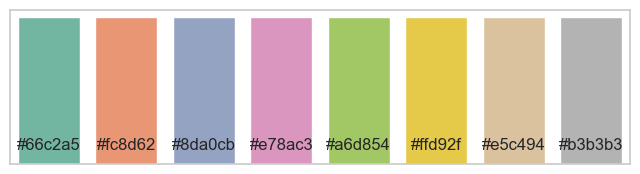

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir la paleta de colores 'Set2'
colores = sns.color_palette('Set2')

# Crear una figura con ejes vacíos
fig, ax = plt.subplots(figsize=(8, 2))

# Dibujar una barra de colores para mostrar los colores de la paleta
sns.barplot(x=list(range(len(colores))), y=[1] * len(colores), palette=colores, ax=ax)

# Configurar los ejes
ax.set_xticks([])  # Ocultar etiquetas en el eje x
ax.set_yticks([])  # Ocultar etiquetas en el eje y

# Obtener los códigos hexadecimales de los colores
codigos_hex = [mcolors.to_hex(color) for color in colores]

# Agregar los códigos hexadecimales junto a las barras de colores
for i, codigo in enumerate(codigos_hex):
    ax.annotate(codigo, (i, 0), textcoords="offset points", xytext=(0, 10), ha='center')
    print(codigo)

# Mostrar la paleta de colores con códigos hexadecimales
plt.show()


In [135]:
# Seleccionamos algunos colores
color_verde = colores[0]
color_salmon = colores[1]
color_gris = colores[2]
color_rosado = colores[3]
color_amarillo = colores[5]

### **4.2.1- Víctimas por Año**

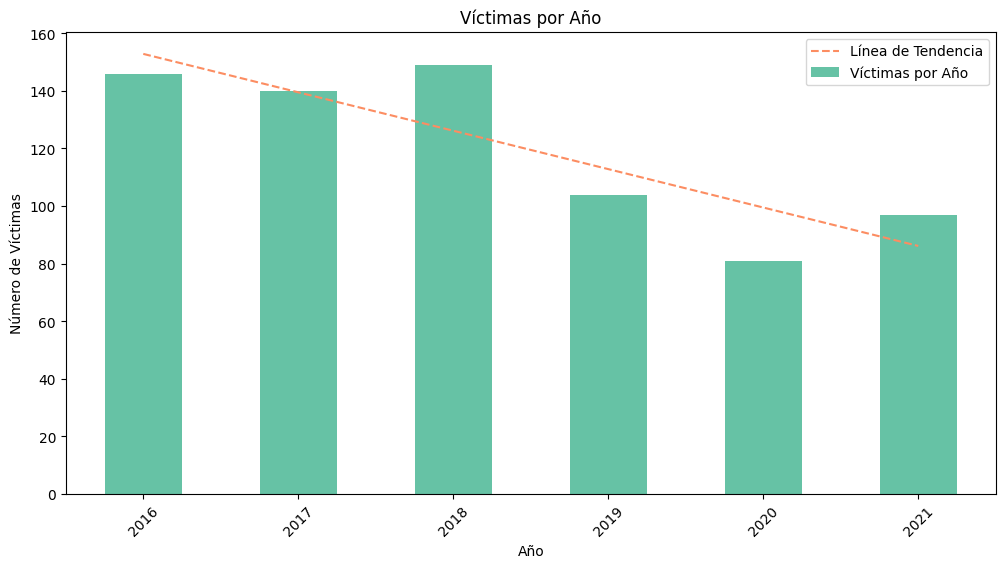

In [149]:
import matplotlib.pyplot as plt

# Agrupamos por año y sumamos las víctimas
victimas_por_anio = hechos_homicidios.groupby('AAAA')['N_VICTIMAS'].sum()

# Creamos un gráfico de barras para mostrar víctimas por año
plt.figure(figsize=(12, 6))
victimas_por_anio.plot(kind='bar', label='Víctimas por Año', color=[color_verde])
plt.title('Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)

# Calculamos la línea de tendencia utilizando polyfit
x = np.arange(len(victimas_por_anio))
y = victimas_por_anio.values
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
plt.plot(x, trendline(x), color=color_salmon, linestyle='--', label='Línea de Tendencia')

plt.legend()
plt.show()

Tenemos datos en el rango 2016-2021. En un primer análisis, y más allá de que dentro del rango se encuentra el 2020 el cual fue un año atípico y no se debería considerar como parámetro normal debido a la pandemia por COVID-19, notamos una tendencia descendiente de víctimas.

### **4.2.2- Víctimas por Mes**

Cantidad de muertes en diciembre: 87


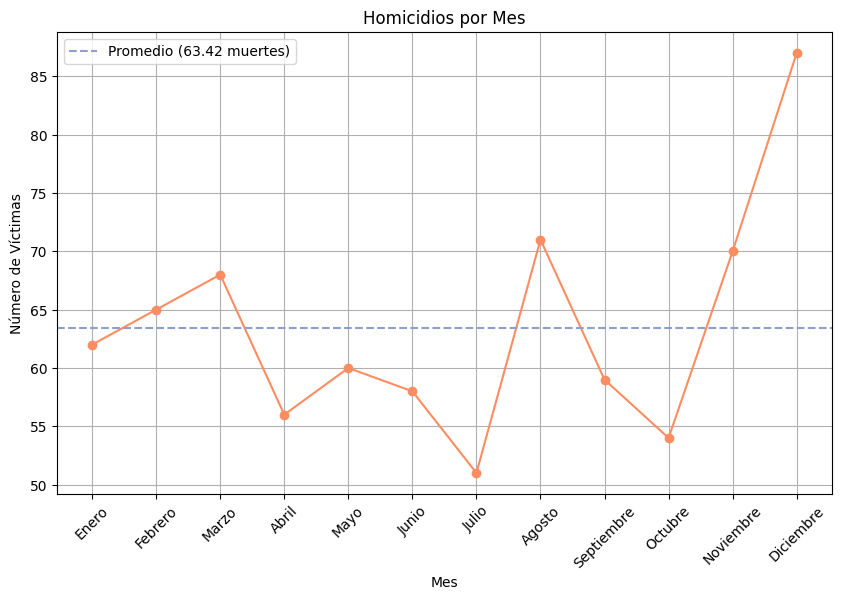

In [138]:
# Agrupamos los homicidios por mes y sumamos las víctimas
homicidios_por_mes = homicidios.groupby('MM')['N_VICTIMAS'].sum()
# Calcular el promedio de muertes en los meses
promedio_muertes = homicidios_por_mes.mean()

# Crear un gráfico de líneas creciente
plt.figure(figsize=(10, 6))
plt.plot(homicidios_por_mes.index, homicidios_por_mes.values, marker='o', linestyle='-', color=color_salmon)
plt.title('Homicidios por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.xticks(homicidios_por_mes.index, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(True)

# Trazar una línea horizontal en el valor del promedio
plt.axhline(y=promedio_muertes, color=color_gris, linestyle='--', label=f'Promedio ({promedio_muertes:.2f} muertes)')
plt.legend()

# Obtener la cantidad de muertes en diciembre
muertes_diciembre = homicidios_por_mes[12]
print(f"Cantidad de muertes en diciembre: {muertes_diciembre}")

plt.show()

Cantidad de muertes en diciembre: 87


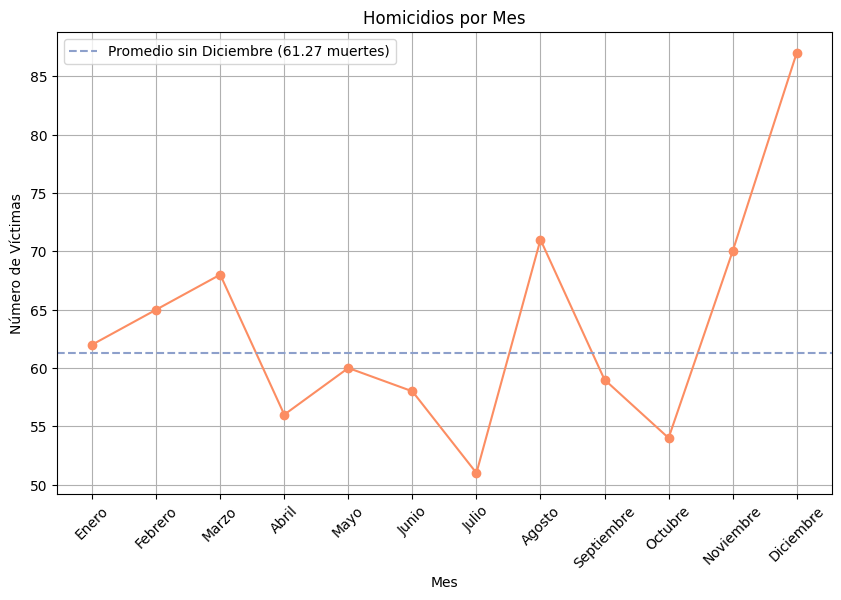

In [139]:
# Agrupamos los homicidios por mes y sumamos las víctimas
homicidios_por_mes = homicidios.groupby('MM')['N_VICTIMAS'].sum()
# Calcular el promedio de muertes en los meses sin incluir diciembre
promedio_muertes_sin_diciembre = homicidios_por_mes[homicidios_por_mes.index != 12].mean()

# Crear un gráfico de líneas creciente
plt.figure(figsize=(10, 6))
plt.plot(homicidios_por_mes.index, homicidios_por_mes.values, marker='o', linestyle='-', color=color_salmon)
plt.title('Homicidios por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.xticks(homicidios_por_mes.index, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(True)

# Trazar una línea horizontal en el valor del promedio sin diciembre
plt.axhline(y=promedio_muertes_sin_diciembre, color=color_gris, linestyle='--', label=f'Promedio sin Diciembre ({promedio_muertes_sin_diciembre:.2f} muertes)')
plt.legend()

# Obtener la cantidad de muertes en diciembre
muertes_diciembre = homicidios_por_mes[12]
print(f"Cantidad de muertes en diciembre: {muertes_diciembre}")

plt.show()


Se observa un creciemiento notorio en el mes de diciembre, puede haber algun factor asocidado, como por ejemplo que es un mes festivo de verano

### **4.2.3- Víctimas por Día de Semana**

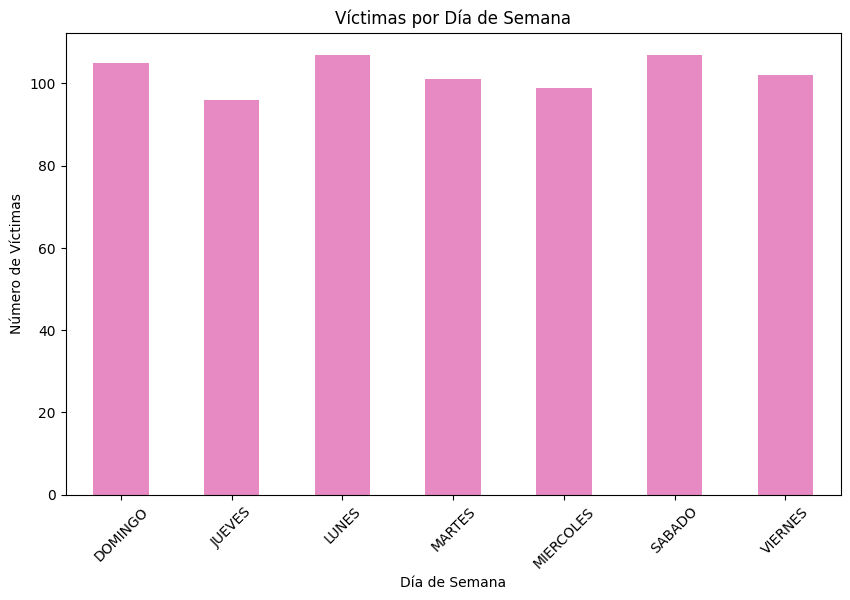

In [140]:
# Agrupamos por día de semana y sumamos las víctimas
victimas_por_dia_semana = hechos_homicidios.groupby('DIA_SEMANA')['N_VICTIMAS'].sum()

colores = sns.color_palette('Set2')
# Creamos un gráfico de barras horizontales para mostrar víctimas por día de semana
plt.figure(figsize=(10, 6))
victimas_por_dia_semana.plot(kind='bar', color=[color_rosado])
plt.title('Víctimas por Día de Semana')
plt.ylabel('Número de Víctimas')
plt.xlabel('Día de Semana')
plt.xticks(rotation=45)
plt.show()


Viendo las víctimas por día de la semana no observamos ninguna diferencia significativa entre algún día u otro.

<Figure size 1000x600 with 0 Axes>

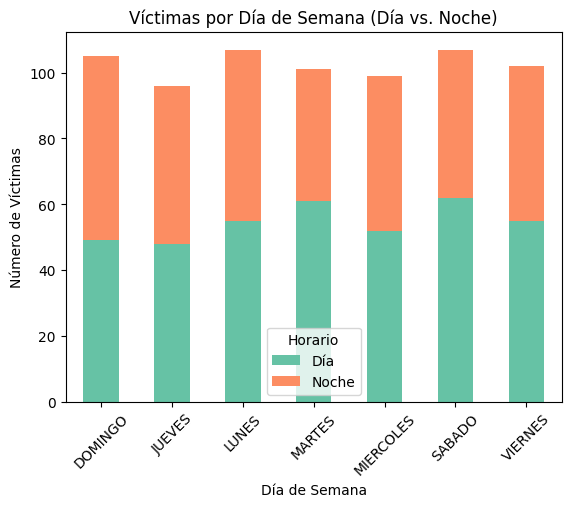

In [93]:
# Agrupa por día de semana y suma las víctimas para el día y la noche
victimas_por_dia_semana = hechos_homicidios.groupby(['DIA_SEMANA', 'DIA_NOCHE'])['N_VICTIMAS'].sum().unstack()

# Define la paleta de colores 'Set2'
colores = sns.color_palette('Set2')

# Crea un gráfico de barras apiladas con la paleta de colores 'Set2'
plt.figure(figsize=(10, 6))
victimas_por_dia_semana.plot(kind='bar', stacked=True, color=colores)
plt.title('Víctimas por Día de Semana (Día vs. Noche)')
plt.xlabel('Día de Semana')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.legend(title='Horario', labels=['Día', 'Noche'])
plt.show()

Analizando los días según el horario tampoco se observa alguna tendencia que nos lleve a considerar una hipótesis alrededor de estas variables.

### **4.2.4 Víctimas por franja horaria**

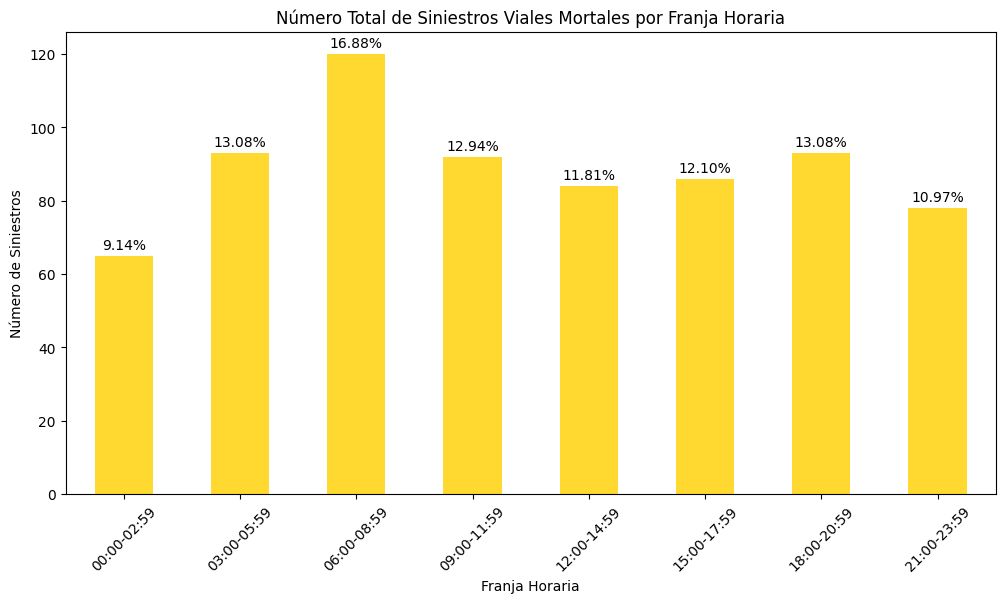

In [141]:
# Crear una columna para las franjas horarias en formato datetime.time
bins = [pd.to_timedelta('00:00:00'), pd.to_timedelta('03:00:00'), pd.to_timedelta('06:00:00'), pd.to_timedelta('09:00:00'), pd.to_timedelta('12:00:00'), pd.to_timedelta('15:00:00'), pd.to_timedelta('18:00:00'), pd.to_timedelta('21:00:00'), pd.to_timedelta('23:59:59')]
labels = ['00:00-02:59', '03:00-05:59', '06:00-08:59', '09:00-11:59', '12:00-14:59', '15:00-17:59', '18:00-20:59', '21:00-23:59']

# Asignar las franjas horarias
homicidios['FRANJA_HORARIA'] = pd.cut(pd.to_timedelta(homicidios['HORA'].astype(str)), bins=bins, labels=labels)

# Resumen estadístico por franja horaria
resumen_franjas = homicidios.groupby('FRANJA_HORARIA').agg({'ID': 'count', 'N_VICTIMAS': 'mean'})
resumen_franjas = resumen_franjas.rename(columns={'ID': 'NUM_SINIESTROS', 'N_VICTIMAS': 'PROMEDIO_VICTIMAS'})

# Gráfico de barras: Número total de siniestros por franja horaria
plt.figure(figsize=(12, 6))
ax = resumen_franjas['NUM_SINIESTROS'].plot(kind='bar', color=[color_amarillo])
plt.title('Número Total de Siniestros Viales Mortales por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)

# Agregar porcentaje en las barras
total_siniestros = resumen_franjas['NUM_SINIESTROS'].sum()
for i, v in enumerate(resumen_franjas['NUM_SINIESTROS']):
    porcentaje = (v / total_siniestros) * 100
    ax.text(i, v + 1, f'{porcentaje:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

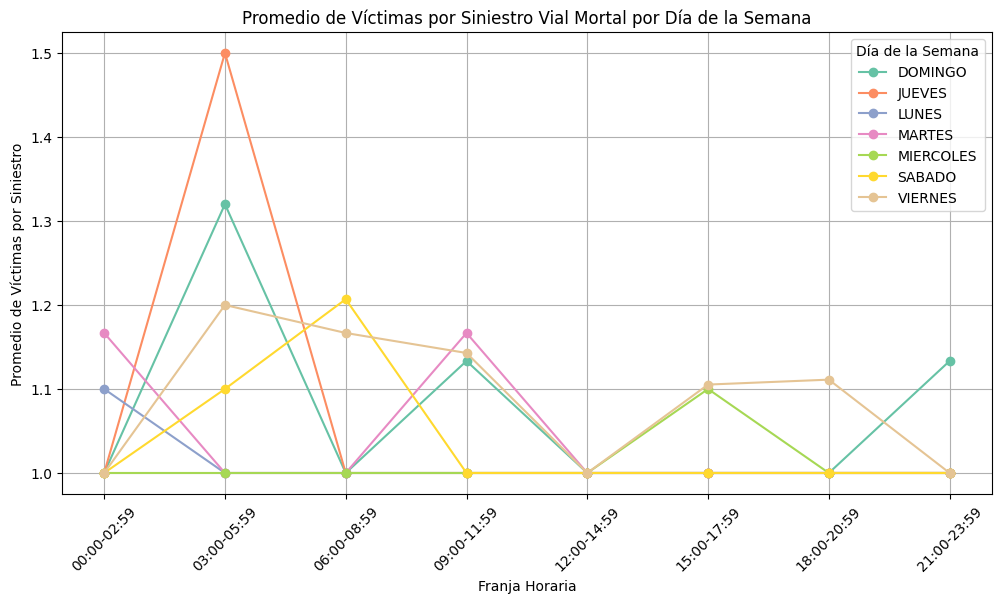

In [146]:
# Crear un DataFrame para el análisis de la distribución por día de la semana
resumen_dias = homicidios.groupby(['DIA_SEMANA', 'FRANJA_HORARIA']).agg({'ID': 'count', 'N_VICTIMAS': 'mean'})
resumen_dias = resumen_dias.rename(columns={'ID': 'NUM_SINIESTROS', 'N_VICTIMAS': 'PROMEDIO_VICTIMAS'})

# Crear un gráfico de líneas para el promedio de víctimas por siniestro por día de la semana
plt.figure(figsize=(12, 6))
for i, dia_semana in enumerate(resumen_dias.index.get_level_values('DIA_SEMANA').unique()):
    promedio_por_dia = resumen_dias.loc[dia_semana, 'PROMEDIO_VICTIMAS']
    
    # Utilizar un color diferente de la paleta personalizada para cada día de la semana
    plt.plot(promedio_por_dia.index, promedio_por_dia.values, marker='o', label=dia_semana, color=colores[i])

plt.title('Promedio de Víctimas por Siniestro Vial Mortal por Día de la Semana')
plt.xlabel('Franja Horaria')
plt.ylabel('Promedio de Víctimas por Siniestro')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Día de la Semana')

plt.show()

Se observa que la mayor cantidad de siniestros se da en entre las 6 y 9 de la mañana, pero el promedio de victimas por siniestro es más alto en el rango de 3 a 5 de la madrugada.

Analizamos los rangos horarios en los diferentes dias de la semana

<Figure size 1200x600 with 0 Axes>

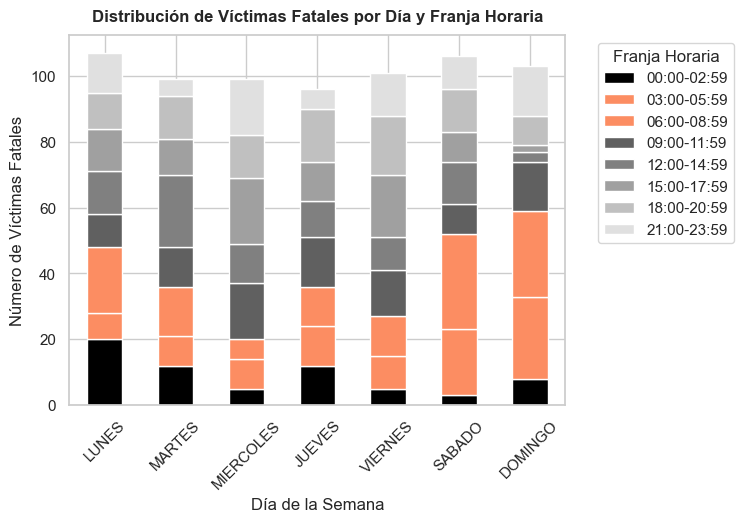

In [194]:
# Crear un DataFrame para el análisis de la distribución
distribucion_diaria_por_franja = homicidios.groupby(['DIA_SEMANA', 'FRANJA_HORARIA']).size().unstack(fill_value=0)

# Reordenar los días de la semana de lunes a domingo
dias_semana_ordenados = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
distribucion_diaria_por_franja = distribucion_diaria_por_franja.reindex(dias_semana_ordenados)

# Importar la paleta de colores de Matplotlib
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

# Crear una paleta de colores con base en "tab20" de Matplotlib
num_tonos_gris = 8
cmap = ListedColormap([cm.gray(i / num_tonos_gris) for i in range(num_tonos_gris)])
colores = [cmap(i) for i in range(len(labels))]

# Colorear de rojo la franja horaria de 3:00 a 8:59 AM de sábados y domingos
colores[1:3] = [color_salmon, color_salmon]

# Gráfico de barras apiladas: Distribución de víctimas por día y franja horaria
plt.figure(figsize=(12, 6))
distribucion_diaria_por_franja.plot(kind='bar', stacked=True, color=colores)
plt.text(0.5, 1.05, 'Distribución de Víctimas Fatales por Día y Franja Horaria', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, fontweight='bold')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Víctimas Fatales')
plt.xticks(rotation=45)
plt.legend(title='Franja Horaria', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [ ]:
# Calcular el porcentaje de víctimas fatales en el rango de 3 a 8:59 para cada día
porcentaje_por_dia = {}
for dia in distribucion_diaria_por_franja.index:
    if dia in ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']:
        victimas_3_8_59 = distribucion_diaria_por_franja.loc[dia, '03:00-05:59'] + distribucion_diaria_por_franja.loc[dia, '06:00-08:59']
        total_dia = distribucion_diaria_por_franja.loc[dia].sum()
        porcentaje = (victimas_3_8_59 / total_dia) * 100
        porcentaje_por_dia[dia] = porcentaje

# Mostrar los porcentajes por día
for dia, porcentaje in porcentaje_por_dia.items():
    print(f"El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días {dia} es del {porcentaje:.2f}% del total de víctimas fatales en ese día.")


El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días LUNES es del 26.17% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días MARTES es del 24.24% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días MIERCOLES es del 15.15% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días JUEVES es del 25.00% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días VIERNES es del 21.78% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días SABADO es del 46.23% del total de víctimas fatales en ese día.
El porcentaje de víctimas fatales en el rango de 3 a 8:59 los días DOMINGO es del 49.51% del total de víctimas fatales en ese día.


Se observa un claro aumento de victimas los dias sabados y domingo en el rango de las 3 a las 9 de la maniana.
Este dato podria conducirnos a un enfoque de analisis sobre la nocturnidad los fines de semana en la ciudad.

### **4.2.5- Víctimas por Comuna**

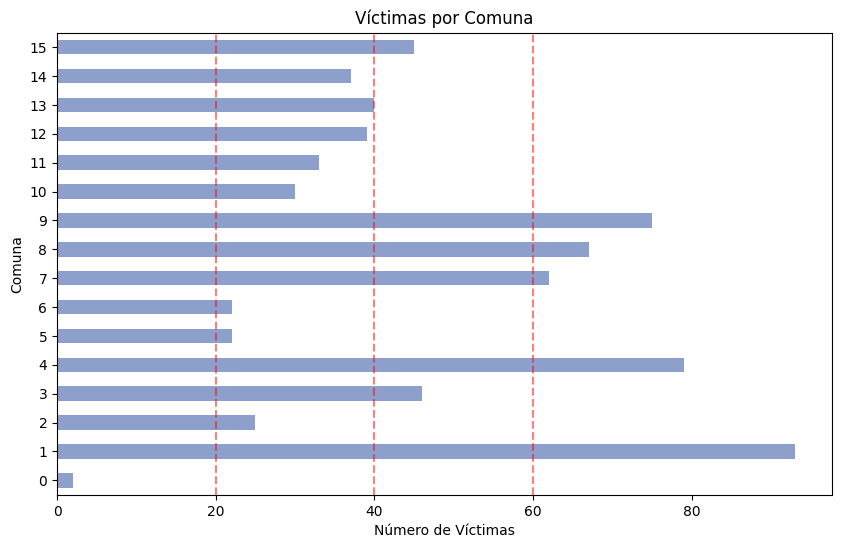

In [ ]:
import matplotlib.pyplot as plt

# Agrupa por comuna y suma las víctimas
victimas_por_comuna = hechos_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum()

# Crea un gráfico de barras para mostrar víctimas por comuna
plt.figure(figsize=(10, 6))
victimas_por_comuna.plot(kind='barh', color=[color_gris])
plt.title('Víctimas por Comuna')
plt.ylabel('Comuna')
plt.xlabel('Número de Víctimas')

# Agrega líneas de referencia en el eje x
valores_de_referencia = [20, 40, 60]  # Puedes ajustar estos valores según tus necesidades
for valor in valores_de_referencia:
    plt.axvline(x=valor, color='red', linestyle='--', alpha=0.5)

plt.show()


Observamos lo mismo pero en un anio en particular, 2021 por ejemplo

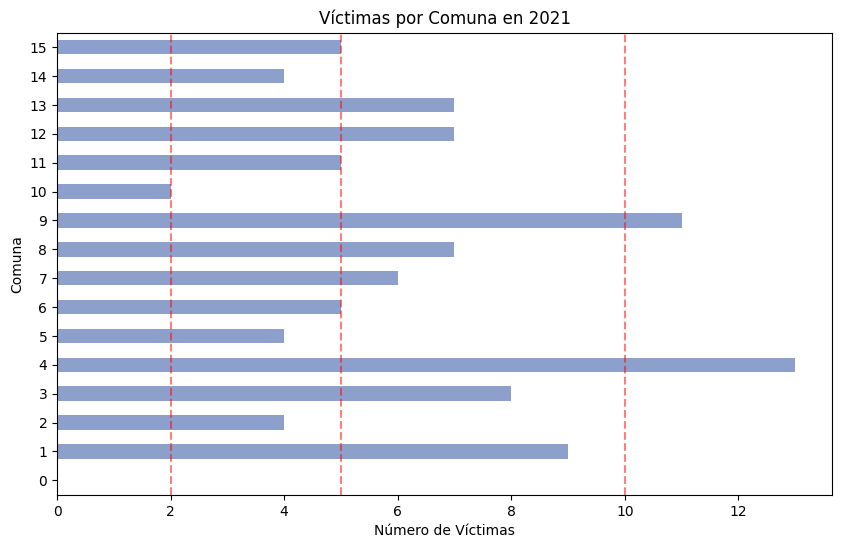

In [ ]:
import matplotlib.pyplot as plt

# Filtra las filas correspondientes al año 2021
hechos_homicidios_2021 = hechos_homicidios[hechos_homicidios['AAAA'] == 2021]

# Agrupa por comuna y suma las víctimas
victimas_por_comuna_2021 = hechos_homicidios_2021.groupby('COMUNA')['N_VICTIMAS'].sum()

# Crea un gráfico de barras para mostrar víctimas por comuna en 2021
plt.figure(figsize=(10, 6))
victimas_por_comuna_2021.plot(kind='barh',color=[color_gris])
plt.title('Víctimas por Comuna en 2021')
plt.ylabel('Comuna')
plt.xlabel('Número de Víctimas')

# Agrega líneas de referencia en el eje x
valores_de_referencia = [2, 5, 10]  # Puedes ajustar estos valores según tus necesidades
for valor in valores_de_referencia:
    plt.axvline(x=valor, color='red', linestyle='--', alpha=0.5)

plt.show()


Observando el número de víctimas por comuna se puede ver grandes diferencias entre las mismas. La comuna 1 por ejemplo, parece ser la que lleva la delantera en número de víctimas. Se considera profundizar en este análisis.

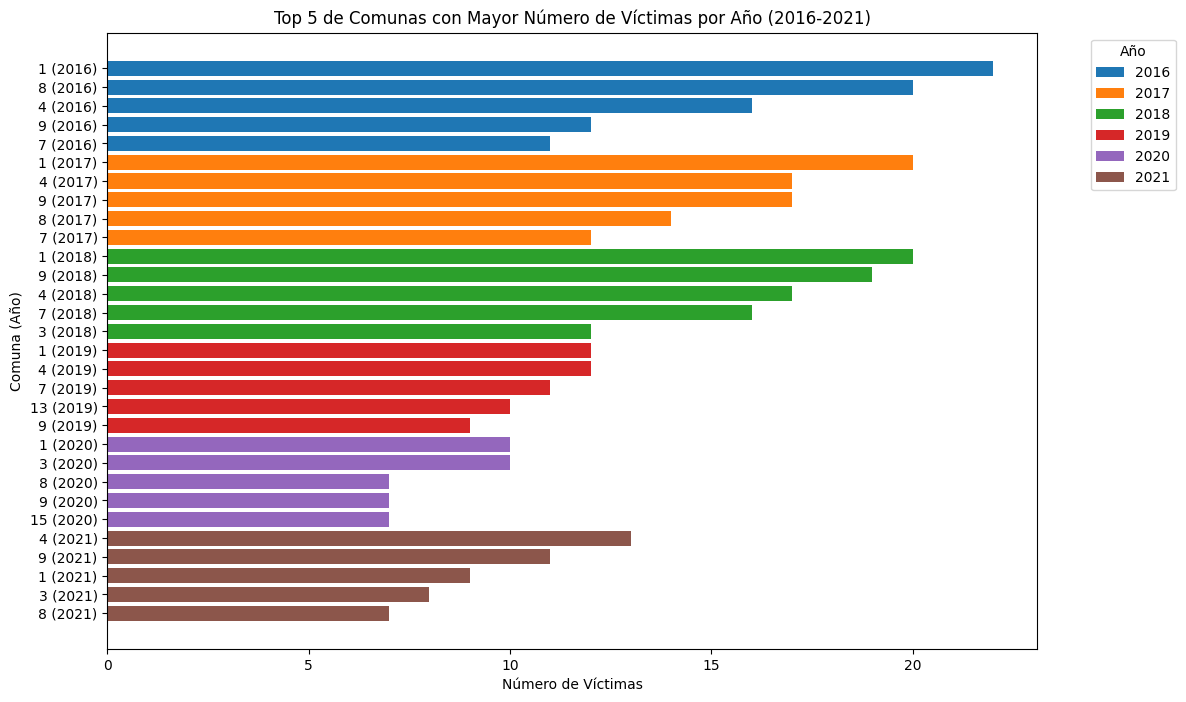

In [ ]:
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos de 2016 a 2021
datos_anuales = []
for año in range(2016, 2022):
    datos_anuales.append(hechos_homicidios[hechos_homicidios['AAAA'] == año])

# Lista para almacenar los DataFrames de las 5 comunas principales por año
top_comunas_por_año = []

# Encontrar las 5 comunas principales para cada año
for año, datos in zip(range(2016, 2022), datos_anuales):
    victimas_por_comuna = datos.groupby('COMUNA')['N_VICTIMAS'].sum()
    top_comunas = victimas_por_comuna.nlargest(5)
    top_comunas_por_año.append((año, top_comunas))

# Crear un gráfico de barras horizontal para las 5 comunas principales por año
plt.figure(figsize=(12, 8))

for año, top_comunas in top_comunas_por_año:
    plt.barh([f'{comuna} ({año})' for comuna in top_comunas.index], top_comunas.values, label=str(año))

plt.title('Top 5 de Comunas con Mayor Número de Víctimas por Año (2016-2021)')
plt.xlabel('Número de Víctimas')
plt.ylabel('Comuna (Año)')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la comuna con el mayor número en la parte superior

plt.show()

Se observa que la columa 1 tuvo la delantera hasta el 2020 pero en 2021 fue la comuna 4 quien se llevo la mayor cantidad de victimas

### **4.2.6- Víctimas por Tipo de Calle**

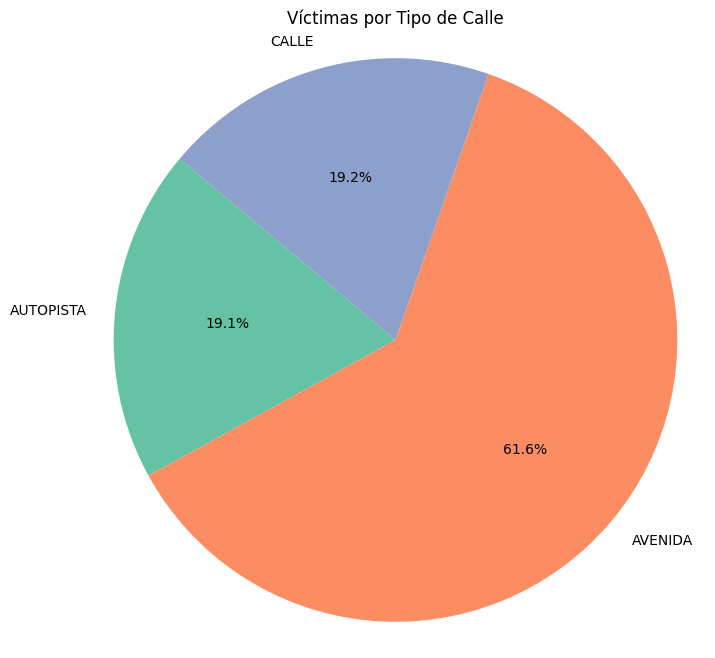

In [ ]:
# Agrupamos por tipo de calle y sumamos las víctimas
victimas_por_tipo_calle = hechos_homicidios.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum()

# Creamos un gráfico de torta para mostrar víctimas por tipo de calle
plt.figure(figsize=(8, 8))
plt.pie(victimas_por_tipo_calle, labels=victimas_por_tipo_calle.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Víctimas por Tipo de Calle')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Aquí se observa una clara dominancia de avenida respecto a calle y autopista que mantienen un nivel similar. Esto nos podría conducir a un insight sobre esta variable.

### **4.2.7- Víctimas por Tipo de Víctima**

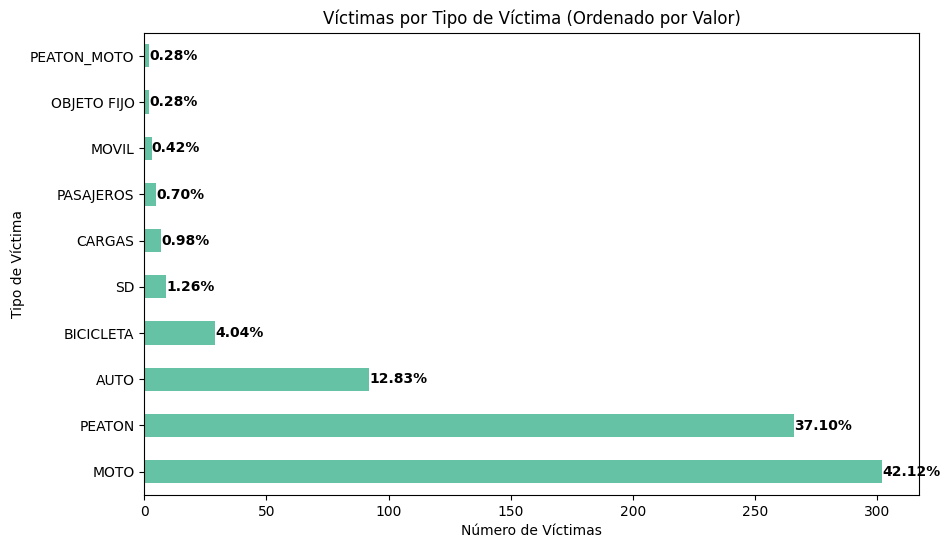

In [ ]:
import matplotlib.pyplot as plt

# Agrupa por tipo de víctima y suma las víctimas
victimas_por_tipo_victima = hechos_homicidios.groupby('VICTIMA')['N_VICTIMAS'].sum()

# Ordena de mayor a menor
victimas_por_tipo_victima = victimas_por_tipo_victima.sort_values(ascending=False)

# Crea un gráfico de barras horizontales ordenado por valor
plt.figure(figsize=(10, 6))
ax = victimas_por_tipo_victima.plot(kind='barh', color=[color_verde])
plt.title('Víctimas por Tipo de Víctima (Ordenado por Valor)')
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Víctima')

# Calcula el porcentaje y agrega etiquetas
total_victimas = sum(victimas_por_tipo_victima)
for i, valor in enumerate(victimas_por_tipo_victima):
    porcentaje = (valor / total_victimas) * 100
    plt.text(valor, i, f'{porcentaje:.2f}%', va='center', color='black', fontweight='bold')

plt.show()

En este caso observamos las víctimas por tipo, ordenamos el gráfico para notar las diferencias y podemos ver una clara dominancia de muertes de motoclistas y peatones.

### **4.2.8- Víctimas por Participantes**

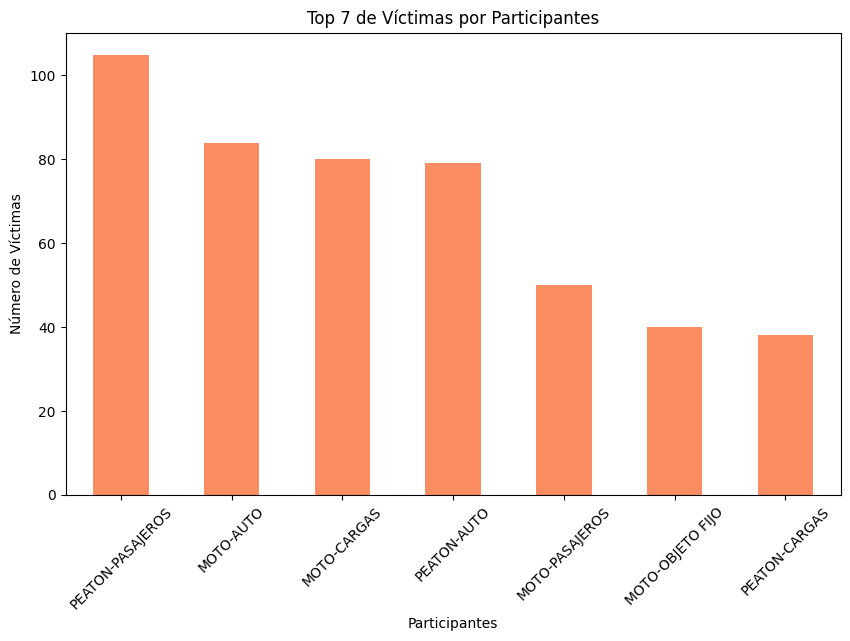

In [ ]:
victimas_por_participantes = hechos_homicidios.groupby('PARTICIPANTES')['N_VICTIMAS'].sum()

# Ordenamos de mayor a menor y seleccionamos los top 7
victimas_top7 = victimas_por_participantes.sort_values(ascending=False).head(7)

# Crea un gráfico de barras para mostrar las víctimas por los 7 principales participantes
plt.figure(figsize=(10, 6))
victimas_top7.plot(kind='bar', color=[color_salmon])
plt.title('Top 7 de Víctimas por Participantes')
plt.xlabel('Participantes')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.show()

Observamos el top 7 de los particpantes en siniestros y vemos que en cuanto a motociclistas parece haber una paridad entre autos y camiones, estando un poco más abajo los siniestros contra colectivos. Sin embargo, si miramos el caso de peatones, hay una clara dominancia por parte de los homicidios causados por colectivos.  

### **4.2.9- Distribución de EDAD**

Creamos un histograma y un boxplot para visualizar la distribución de edades de las víctimas. Esto no da una idea de cómo se distribuyen las edades.

Esto nos muestra graficamente lo que ya habíamos analizado con el resumen estadístico.

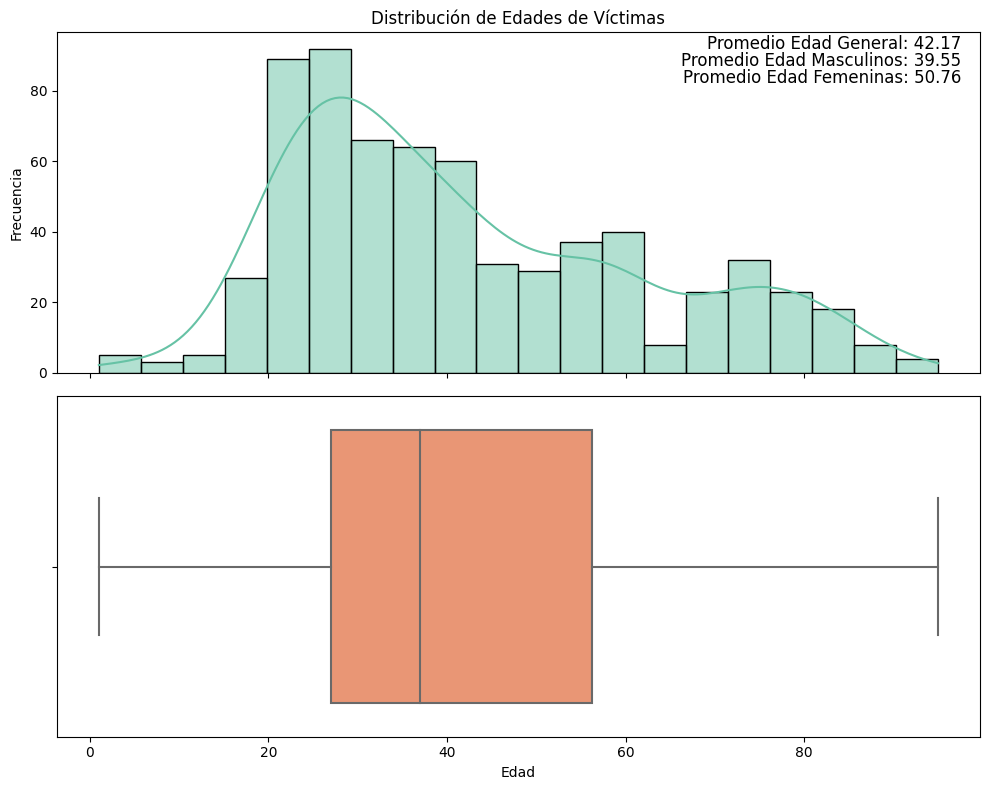

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las edades no nulas y convertirlas a una lista
edades = homicidios['EDAD'].dropna().tolist()

# Calcular el promedio de edad general de las víctimas
promedio_edad_general = sum(edades) / len(edades)

# Filtrar las víctimas por género (por ejemplo, 'M' para masculino y 'F' para femenino)
edades_masculinas = homicidios[homicidios['SEXO'] == 'MASCULINO']['EDAD'].dropna().tolist()
edades_femeninas = homicidios[homicidios['SEXO'] == 'FEMENINO']['EDAD'].dropna().tolist()

# Calcular el promedio de edad para masculinos y femeninas
promedio_edad_masculinos = sum(edades_masculinas) / len(edades_masculinas)
promedio_edad_femeninas = sum(edades_femeninas) / len(edades_femeninas)

# Crear una figura con dos subgráficos (histograma y diagrama de caja)
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# Subgráfico 1: Histograma
sns.histplot(edades, bins=20, color=color_verde, ax=axes[0], kde=True)
axes[0].set_title('Distribución de Edades de Víctimas')
axes[0].set_ylabel('Frecuencia')

# Subgráfico 2: Diagrama de caja
sns.boxplot(edades, color=color_salmon, ax=axes[1], orient='h')
axes[1].set_xlabel('Edad')
axes[1].set_yticklabels([])

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Agregar etiquetas de promedio y porcentaje en la esquina superior derecha
texto_promedio_general = f'Promedio Edad General: {promedio_edad_general:.2f}'
texto_promedio_masculinos = f'Promedio Edad Masculinos: {promedio_edad_masculinos:.2f}'
texto_promedio_femeninas = f'Promedio Edad Femeninas: {promedio_edad_femeninas:.2f}'

axes[0].annotate(texto_promedio_general, xy=(0.98, 0.95), xycoords='axes fraction', ha='right', fontsize=12, color='black')
axes[0].annotate(texto_promedio_masculinos, xy=(0.98, 0.9), xycoords='axes fraction', ha='right', fontsize=12, color='black')
axes[0].annotate(texto_promedio_femeninas, xy=(0.98, 0.85), xycoords='axes fraction', ha='right', fontsize=12, color='black')

plt.show()

**Observamos con más detalle las víctimas según sus edades, para ellos agrupamos en rangos etarios**

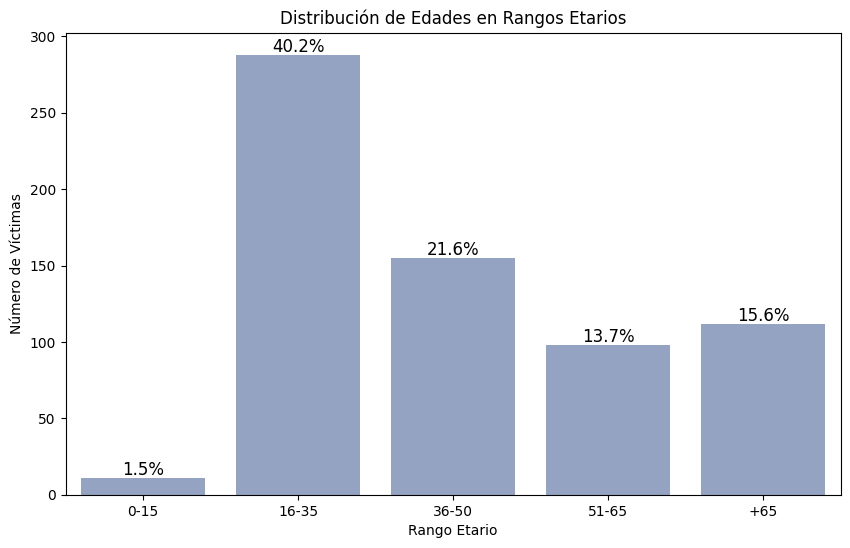

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los límites de los rangos etarios
bins = [0, 15, 35, 50, 65, float('inf')]  # Los límites de los rangos

# Etiquetas para los rangos
etiquetas = ['0-15', '16-35', '36-50', '51-65', '+65']

# Crear una nueva columna 'RANGO_ETARIO' en el DataFrame
homicidios['RANGO_ETARIO'] = pd.cut(homicidios['EDAD'], bins=bins, labels=etiquetas, right=False)

# Contar cuántos registros hay en cada rango etario
conteo_rangos_etarios = homicidios['RANGO_ETARIO'].value_counts().sort_index()

# Calcular los porcentajes para cada rango etario
total_victimas = len(homicidios)
porcentajes = (conteo_rangos_etarios / total_victimas * 100).round(1)  # Redondear a 2 decimales

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_rangos_etarios.index, y=conteo_rangos_etarios, color=color_gris)
plt.title('Distribución de Edades en Rangos Etarios')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=0)

# Agregar los porcentajes como etiquetas en el gráfico
for i, porcentaje in enumerate(porcentajes):
    ax.text(i, conteo_rangos_etarios[i] + 2, f'{porcentaje}%', ha='center', fontsize=12, color='black')

plt.show()

En cuanto a las edades como ya lo veniamos observando, la gran mayoria de las victimas esta en el rango de 16 a 35 anios

**Gráfico de Barras de Género**

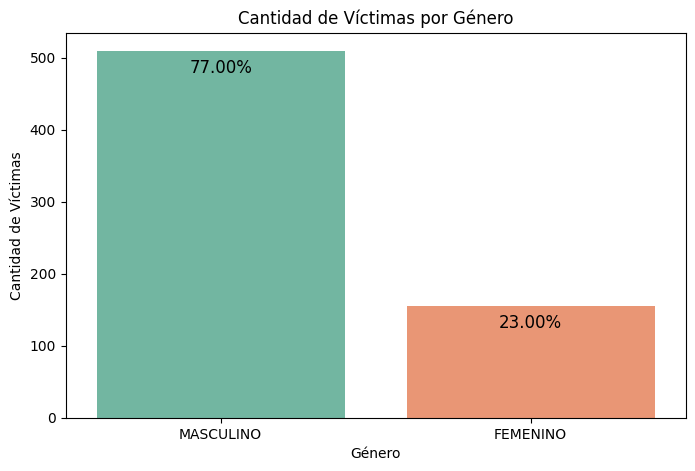

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para excluir la categoría "SD" en la columna EDAD
homicidios_filtrados = homicidios[homicidios['EDAD'] != 'SD']

# Calcular el porcentaje de cada sexo
total_victimas = len(homicidios_filtrados)
porcentaje_masculino = round((homicidios_filtrados['SEXO'] == 'MASCULINO').sum() / total_victimas * 100)
porcentaje_femenino = round((homicidios_filtrados['SEXO'] == 'FEMENINO').sum() / total_victimas * 100)

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=homicidios_filtrados, x='SEXO', palette='Set2')
plt.title('Cantidad de Víctimas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Víctimas')

# Mostrar el porcentaje en el eje y
plt.text(0, (homicidios_filtrados['SEXO'] == 'MASCULINO').sum() - 30, f'{porcentaje_masculino:.2f}%', ha='center', fontsize=12, color='black')
plt.text(1, (homicidios_filtrados['SEXO'] == 'FEMENINO').sum() - 30, f'{porcentaje_femenino:.2f}%', ha='center', fontsize=12, color='black')

plt.show()

En cuanto al genero podemos observar que la gran mayoria de victimas fueron masculinos

**Gráfico de Edad por Género**

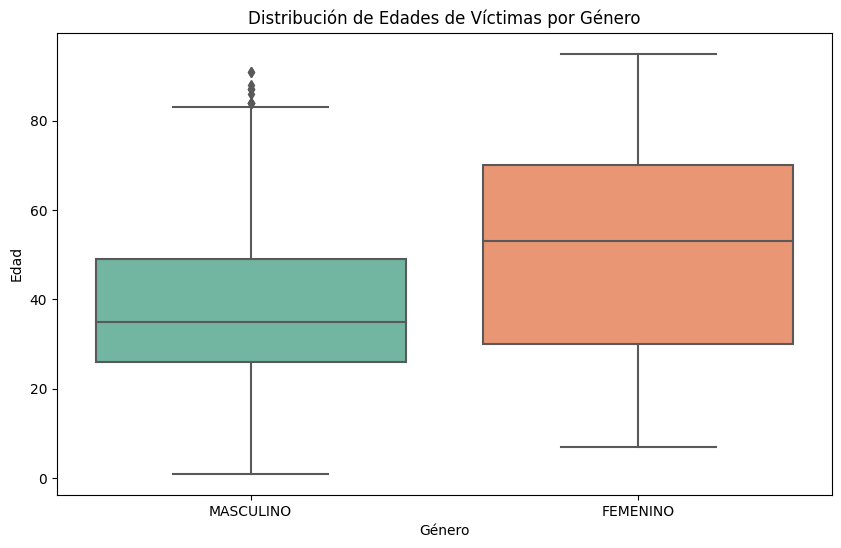

In [ ]:
# Filtrar los datos para excluir la categoría "SD" en la columna EDAD
homicidios_filtrados = homicidios[homicidios['EDAD'] != 'SD']

# Crear un gráfico de caja de edad por género con los datos filtrados
plt.figure(figsize=(10, 6))
sns.boxplot(data=homicidios_filtrados, x='SEXO', y='EDAD', palette='Set2')
plt.title('Distribución de Edades de Víctimas por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

Analizando las edades por genero vemos una mayor dispersion en las víctimas masculinas y que hay una media de edad mas baja en hombres. Además se puede ver algunos valores atípicos en hombres, los mismos hacen referencia a adultos mayores a 80 años, pero ninguno se va más allá de lo que puede ser una edad real. 

**Gráfico de dispersión**

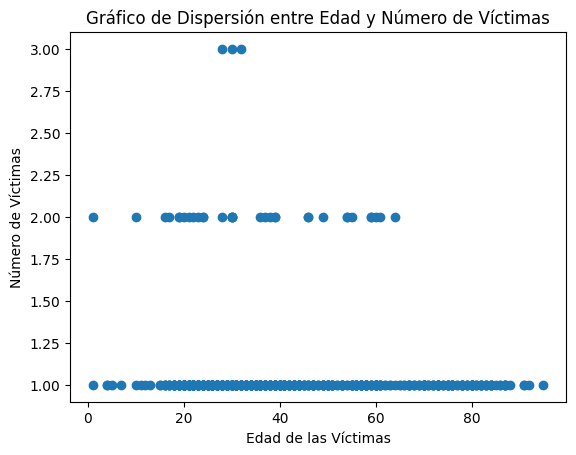

In [ ]:
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en EDAD
homicidios_sin_nulos = homicidios.dropna(subset=['EDAD'])

# Crear el gráfico de dispersión a partir de las columnas "EDAD" y "N_VICTIMAS"
plt.scatter(homicidios_sin_nulos['EDAD'], homicidios_sin_nulos['N_VICTIMAS'])

# Agregar etiquetas y título
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Número de Víctimas')
plt.title('Gráfico de Dispersión entre Edad y Número de Víctimas')

# Mostrar el gráfico
plt.show()


Un dato a resaltar de este análisis es que los siniestros que se cobraron 3 vidas tienen una característica en común, las edades de las víctimas son muy similares.

## **4.3- Análisis de correlación**

Realizamos la prueba de Kruskal-Wallis para analizar correlaciones entre las variables

- El estadístico de Kruskal-Wallis (kruskal_statistic) mide si hay diferencias significativas entre las distribuciones de N_VICTIMAS en diferentes categorías de la variable categórica. Un valor alto del estadístico indica que hay diferencias significativas.

- El p-valor (p_value) es la probabilidad de obtener un estadístico de Kruskal-Wallis tan extremo como el observado si las distribuciones son iguales. Un p-valor pequeño (generalmente menor que 0.05) sugiere que las distribuciones son significativamente diferentes.

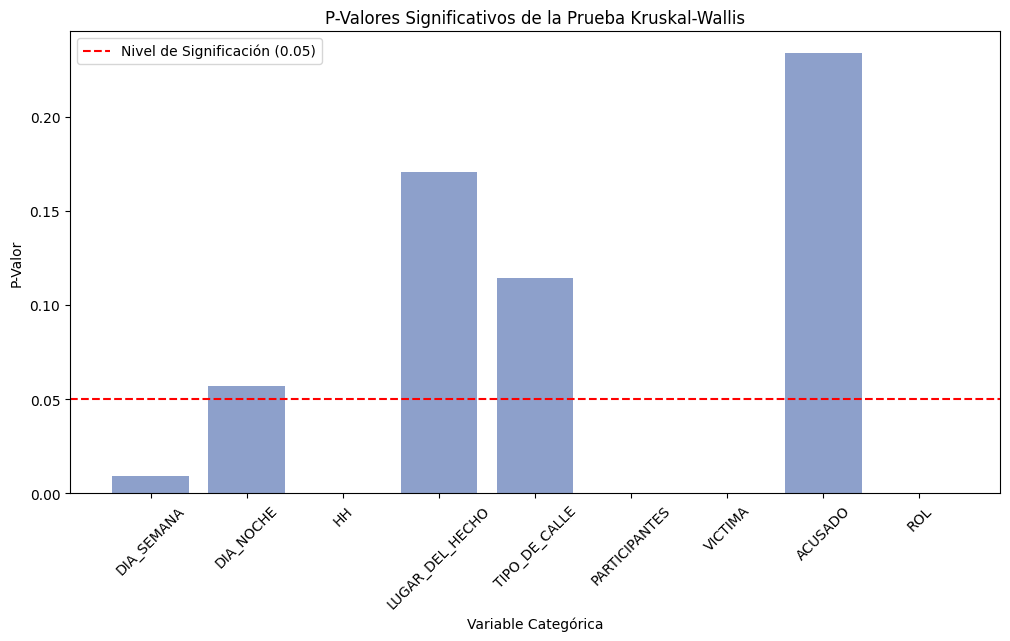

                 Kruskal-Stat       p-Value
DIA_SEMANA          17.018396  9.215874e-03
DIA_NOCHE            3.624884  5.692155e-02
HH                  70.941500  8.694331e-07
LUGAR_DEL_HECHO    716.000000  1.709072e-01
TIPO_DE_CALLE        4.340872  1.141278e-01
COMUNA               9.993904  8.201232e-01
PARTICIPANTES      164.818267  4.369779e-17
VICTIMA            126.406656  6.492597e-23
ACUSADO             11.653345  2.335649e-01
ROL                 73.259827  4.649046e-15
SEXO                 1.351492  5.087768e-01


In [ ]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Variables categóricas que deseas analizar
variables_categoricas = ["DIA_SEMANA", "DIA_NOCHE", "HH", "LUGAR_DEL_HECHO", "TIPO_DE_CALLE", "COMUNA", "PARTICIPANTES", "VICTIMA", "ACUSADO", "ROL", "SEXO"]

# Diccionario para almacenar resultados
correlation_results = {}

# Realiza la prueba de Kruskal-Wallis para cada variable categórica
for variable in variables_categoricas:
    grouped_data = [homicidios['N_VICTIMAS'][homicidios[variable] == categoria] for categoria in homicidios[variable].unique()]
    kruskal_statistic, p_value = kruskal(*grouped_data)
    correlation_results[variable] = {'Kruskal-Stat': kruskal_statistic, 'p-Value': p_value}

# Convierte el diccionario en un DataFrame para facilitar la visualización
result_df = pd.DataFrame.from_dict(correlation_results, orient='index')

# Filtra los resultados significativos (p-valor < 0.05)
significant_results = result_df[result_df['p-Value'] < 0.25]

# Gráfico de barras para p-valores significativos
plt.figure(figsize=(12, 6))
plt.bar(significant_results.index, significant_results['p-Value'], color=[color_gris])
plt.title('P-Valores Significativos de la Prueba Kruskal-Wallis')
plt.xlabel('Variable Categórica')
plt.ylabel('P-Valor')
plt.xticks(rotation=45)
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de Significación (0.05)')
plt.legend()
plt.show()

# Imprime el DataFrame completo de resultados
print(result_df)

Este analisis nos dice que la variable DIA_SEMANA es la unica que mantiene una correlacion estadisticamente significativa con el numero de victimas. Segun esta prueba entre los dias hay diferencias significativas que pueden arrojar informacion valiosa. Sin embargo esto no ocurre con la variable tipo de calle, la cual se esperaba que arroje un p_value significativo ya que se venia observando una clara dominancia en la cantidad de victimas dentro de las avenidas respecto de las demas categorias.   

# **5- CONCLUSIONES E INSIGHTS**

A fin de canalizar todo el conocimiento generado en el análisis exploratorio de datos llevado a cabo, se listan las conclusiones a modo de resumen del análisis y los insights que desde el punto de vista del analista merecen profundizarse posteriormente. 

- Se registraron 717 víctimas fatales en siniestros viales entre 2016 y 2021 en CABA.
- Se observa una leve tendencia a la baja, sobre todo desde 2019 en adelante
- 77 % de las vícitmas fueron masculinos y 23 % femeninas
- La edad media general de las víctimas es de 42 años, 39 en hombres y 51 en mujeres. El 40,2 % tenía entre 16 y 35 años.
- Entre los meses, Diciembre muestra una notoria diferencia respecto a los demás, fueron 87 los homicidos totales en este mes contra 61 en promedio del resto.
- Un 17 % de los homicidios se dio entre las 6 y 9 de la mañana pero los fines de semana (sábados y domingos) el rango entre las 3hs y 9hs se lleva casi el 50 % de las víctimas. Además el promedio de muertes en los hechos aumenta considerablemente en la madrugada y primeras horas del día.
- El 61,6 % de los siniestros viales se dio en avenidas.
- El 42 % de las víctimas fueron motociclistas y el 37 % peatones
- La mayoría de las muertes de peatones fueron provocadas por vehículos de transporte de pasajeros.
- Se recomienda continuar monitoreando y reforzar las campañas de seguridad vial, especialmente dirigidas a conductores de motos y usuarios de avenidas, en días específicos y en el mes de diciembre. 
- Se recomienda prestar especial atención a los datos observados durante los fines de semana en la madrugada y las primeras horas del día, ya que esta franja horaria concentra casi el 50 % de las víctimas fatales en siniestros viales durante esos días. Este hallazgo podría indicar la necesidad de implementar medidas de prevención y concientización específicas para reducir los incidentes en este período.